# 0. Librerias

In [ ]:
!pip install ydata_profiling --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=00be140669d5e4d1949976a217a4df033f724edadcb9baf2def5d9689e5eb66a
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Sistema de archivos y operaciones básicas
import datetime
from datetime import datetime, timedelta
import time
import threading
import re

# Manipulación de datos y análisis
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

# Análisis y preprocesamiento de datos
from ydata_profiling import ProfileReport
from sklearn.preprocessing import MinMaxScaler

# Modelado predictivo
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# Modelos avanzados de Machine Learning
import lightgbm as lgb
from lightgbm import LGBMRegressor
import xgboost as xgb
from xgboost import XGBRegressor

# Progreso de bucles
from tqdm import tqdm

# Integración con Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Datos financieros
import yfinance as yf

Mounted at /content/drive


# Definición de Parámetros

In [ ]:
start_date_str = "2000-01-04"
end_date_str = "2023-12-31"
start_date = datetime.strptime(start_date_str, "%Y-%m-%d")
end_date = datetime.strptime(end_date_str, "%Y-%m-%d")
next_day = end_date + timedelta(days=3)

test_size = 0.1
test_size_0_2 = 0.2
test_val = 0.5
random_seed = 42
cross_validation = 5
n_jobs = -1
verbose = 2

threshold_non_scaled = 0.5

it_start_date = start_date
it_end_date = end_date

In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))

Parámetros para la Regresión Lineal

In [ ]:
param_grid_lr = {
    'fit_intercept': [True, False],  # Si se debe calcular el intercepto
    'copy_X': [True, False],  # Si se debe copiar X antes de ajustarlo, evitando que se modifiquen los datos originales
    'positive': [True, False],  # Si se deben forzar los coeficientes a ser positivos
    'n_jobs': [None, -1]  # Número de trabajos paralelos para ejecutar (-1 significa utilizar todos los procesadores disponibles)
}

Parámetros para el Random Forest

In [ ]:
rf = RandomForestRegressor(bootstrap=True,
                           max_depth=3,
                           min_samples_leaf=2,
                           min_samples_split=2,
                           n_estimators=500,
                           random_state=random_seed)

Parámetros para el LightGMB

In [ ]:
num_round = 100

# Definir los parámetros del modelo
params_lgmb = {
    'objective': 'regression',
    'metric': 'mse',
    'num_leaves': 20,
    'learning_rate': 0.05,
    'n_estimators': 50,
    'reg_alpha': 0.1,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1
}



# Definir los hiperparámetros que deseas ajustar
param_grid_lgmb = {
    'learning_rate': [0.01, 0.05, 0.2],
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300]
}

Parámetros para el XGBoost

In [ ]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.02, 0.15, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# 1. EDA y normalización


In [ ]:
# Descargar datos de Monster Beverage Corporation (MNST)
data = yf.download("MNST", start=start_date, end=end_date, interval="1d")
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,0.044922,0.045573,0.042969,0.042969,0.042969,2438400
2000-01-05,0.044271,0.045573,0.042969,0.042969,0.042969,1430400
2000-01-06,0.043294,0.044271,0.042969,0.044271,0.044271,2400000
2000-01-07,0.043294,0.046875,0.042969,0.043294,0.043294,5251200
2000-01-10,0.043945,0.044271,0.043294,0.043620,0.043620,6307200
...,...,...,...,...,...,...
2023-12-22,55.650002,56.349998,55.520000,56.009998,56.009998,3942500
2023-12-26,55.900002,56.919998,55.900002,56.790001,56.790001,3469100
2023-12-27,56.840000,57.369999,56.720001,57.340000,57.340000,3606200


Vamos a calcular la rentabilidad, que será nuestro target.

In [ ]:
data['Rentabilidad'] = ((data['Close'] - data['Open']) / data['Open']) * 100

In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Rentabilidad
Date,,,,,,,
2000-01-04,0.044922,0.045573,0.042969,0.042969,0.042969,2438400,-4.347540
2000-01-05,0.044271,0.045573,0.042969,0.042969,0.042969,1430400,-2.940977
2000-01-06,0.043294,0.044271,0.042969,0.044271,0.044271,2400000,2.256660
2000-01-07,0.043294,0.046875,0.042969,0.043294,0.043294,5251200,0.000000
2000-01-10,0.043945,0.044271,0.043294,0.043620,0.043620,6307200,-0.739556


In [ ]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Rentabilidad'], dtype='object')

In [ ]:
data.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Adj Close       float64
Volume            int64
Rentabilidad    float64
dtype: object

In [ ]:
data.shape

(6036, 7)

In [ ]:
# EDA: Monster Beverage.

features_report = ['Open', 'High', 'Low', 'Close', "Adj Close", 'Volume']
profile = ProfileReport(data[features_report])
profile.to_file("output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
correlation_matrix = data.corr()
# Mostrar la matriz de correlación
print("Matriz de correlación:")
correlation_matrix

Matriz de correlación:


,Open,High,Low,Close,Adj Close,Volume,Rentabilidad
Open,1.000000,0.999919,0.999910,0.999828,0.999828,-0.236619,-0.038552
High,0.999919,1.000000,0.999883,0.999917,0.999917,-0.235444,-0.034037
Low,0.999910,0.999883,1.000000,0.999920,0.999920,-0.237728,-0.034062
Close,0.999828,0.999917,0.999920,1.000000,1.000000,-0.236581,-0.029816
Adj Close,0.999828,0.999917,0.999920,1.000000,1.000000,-0.236581,-0.029816
Volume,-0.236619,-0.235444,-0.237728,-0.236581,-0.236581,1.000000,0.026180
Rentabilidad,-0.038552,-0.034037,-0.034062,-0.029816,-0.029816,0.026180,1.000000


### 1.2. Graficación de valores

In [ ]:
def plot_line_chart(ticker):
    # Descargar datos normalmente para el ticker proporcionado
    data = yf.download(ticker, start=start_date, end=end_date, interval="1d")
    selected_columns = data['Close']

    # Crear el gráfico de líneas
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=selected_columns.index, y=selected_columns, mode='lines', name=f'Close_{ticker}'))

    # Configurar el diseño del gráfico
    fig.update_layout(title=f'Gráfico de Líneas para {ticker}',
                      xaxis_title='Fecha',
                      yaxis_title='Precio',
                      template='plotly_dark')

    # Mostrar el gráfico
    fig.show()

# Llamar a la función para el ticker "MNST" (Monster)
plot_line_chart("MNST")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
def plot_candlestick_chart(ticker):
    # Descargar datos normalmente para el ticker proporcionado
    data = yf.download(ticker, start=start_date, end=end_date, interval="1d")

    # Crear el gráfico de velas
    fig = go.Figure(data=[go.Candlestick(x=data.index,
                                          open=data['Open'],
                                          high=data['High'],
                                          low=data['Low'],
                                          close=data['Close'])])

    # Configurar el diseño del gráfico
    fig.update_layout(title=f'Gráfico de Velas para {ticker}',
                      xaxis_title='Fecha',
                      yaxis_title='Precio',
                      template='plotly_dark')

    # Mostrar el gráfico
    fig.show()

# Llamar a la función para el ticker "MNST" (Monster)
plot_candlestick_chart("MNST")

[*********************100%%**********************]  1 of 1 completed


### 1.3. Normalización y correspondiente EDA

Normalizamos las columnas de volumen y rentabilidad para tener valores en un rango entre [-1,1].
Lo hacemos para ayudar a mejorar la interpretación y el rendimiento de los modelos de aprendizaje automático, especialmente en el contexto de la rentabilidad de acciones, donde se espera una amplia gama de valores positivos y negativos.

In [ ]:
# Normalizar la columna "Volume y Rentabilidad"
data['Volume_normalized'] = scaler.fit_transform(data[['Volume']])

data['Rentabilidad_normalized'] = scaler.fit_transform(data[['Rentabilidad']])

In [ ]:
# EDA MODELO ESCALADO (PROFILE REPORT CON TODAS LAS COLUMNAS)

features_report = ['Open', 'High', 'Low', 'Close','Adj Close','Volume','Rentabilidad','Volume_normalized','Rentabilidad_normalized']
profile = ProfileReport(data[features_report])
profile.to_file("output.html")

profile

Output hidden; open in https://colab.research.google.com to view.

# 2. Definir Target y dividir en entrenamiento, test y validación



El target será la rentabilidad diaria de cada acción, para ello la hemos calculado anteriormente.

In [ ]:
# Seleccionar los datos para el IT
df_it = data.loc[(data.index >= it_start_date) & (data.index <= it_end_date)]

# Dividir el DataFrame en características (X) y la variable objetivo (y)
X = df_it.drop(["Rentabilidad", "Rentabilidad_normalized" ,"Close","Volume"], axis=1)
y = df_it["Rentabilidad_normalized"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=test_size, random_state=random_seed)

# Dividir los datos temporales en conjuntos de validación y prueba
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_val, random_state=random_seed)

# Imprimir el número de filas en cada conjunto
print("IT DataSet has {} rows".format(len(df_it)))
print("X_train has {} rows".format(len(X_train)))
print("X_val has {} rows".format(len(X_val)))
print("X_test has {} rows".format(len(X_test)))

IT DataSet has 6036 rows
X_train has 5432 rows
X_val has 302 rows
X_test has 302 rows


Observamos si en nuestros df creados tenemos valores nan ya que no es recomendable tenerlos en la regresión lineal ni en el random forest

In [ ]:
nan_values = df_it.isna().any().any()

if nan_values:
    count_nan = df_it.isna().sum().sum()  # Suma de todos los valores NaN
    print(f"Tu DataFrame 'data' contiene {count_nan} valores NaN.")
else:
    print("Tu DataFrame 'data' no contiene valores NaN.")

Tu DataFrame 'data' no contiene valores NaN.


# 3. COMPARACION DE MODELOS:

Para nuestro estudio, vamos a realizar una comparacion del MSE entre los modelos de Regresio Lineal, Random Forest y LightGMB, nos quedaremos con el que el error sea menor y nos aporte mayor fiabilidad al estudio.

## 3.1. Regresión Lineal



In [ ]:
list(data.columns)

['Open',
 'High',
 'Low',
 'Close',
 'Adj Close',
 'Volume',
 'Rentabilidad',
 'Volume_normalized',
 'Rentabilidad_normalized']

In [ ]:
list(X)

['Open', 'High', 'Low', 'Adj Close', 'Volume_normalized']

In [ ]:
list(y.head(3))

[-0.3194783971203333, -0.25157760405236174, -0.0006654303755699587]

## 3.1. REGRESION LINEAL

Mean Squared Error: 0.015224279226273237


Text(0, 0.5, 'Frecuencia')

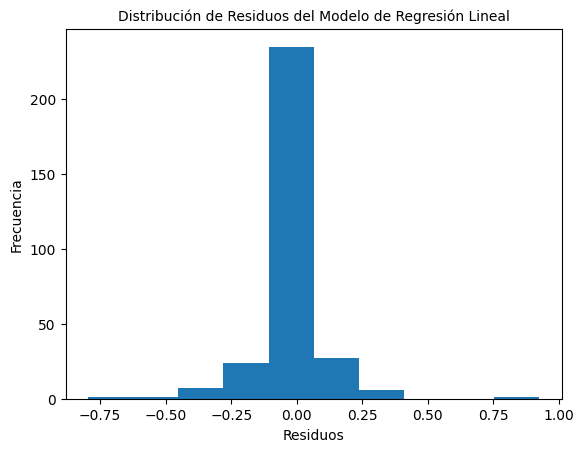

In [ ]:
# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
# print(f'R-squared: {r2}') no lo usamos
plt.hist(y_test - y_pred) # vemos que esta centrado en el 0, por lo que podemos aceptarlo

plt.title("Distribución de Residuos del Modelo de Regresión Lineal", fontsize=10)
plt.xlabel("Residuos", fontsize=10)
plt.ylabel("Frecuencia", fontsize=10)

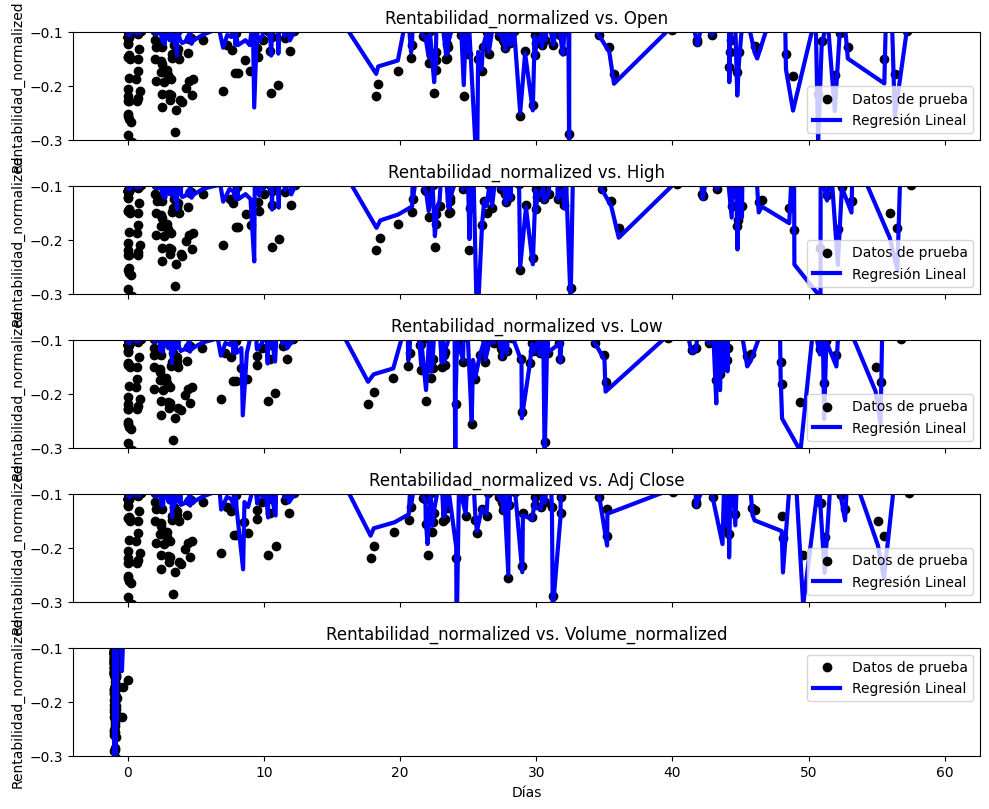

In [ ]:
# Seleccionar las características que deseas visualizar
features = ['Open', 'High', 'Low', 'Adj Close','Volume_normalized']

# Crear una figura y subtramas
fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(10, 8), sharex=True)

# Iterar sobre cada característica y crear un gráfico para ella
for i, feature in enumerate(features):
    # Seleccionar la característica y ordenar los valores
    X_feature = X_test[feature]
    sorted_indices = X_feature.argsort()
    X_feature_sorted = X_feature.iloc[sorted_indices]
    y_test_sorted = y_test.iloc[sorted_indices]
    y_pred_sorted = y_pred[sorted_indices]

    # Graficar la regresión lineal y los datos de prueba para la característica actual
    axes[i].scatter(X_feature_sorted, y_test_sorted, color='black', label='Datos de prueba')
    axes[i].plot(X_feature_sorted, y_pred_sorted, color='blue', linewidth=3, label='Regresión Lineal')
    axes[i].set_ylabel('Rentabilidad_normalized')
    axes[i].set_title('Rentabilidad_normalized vs. ' + feature)
    axes[i].legend()

    # Aplicar zoom en el eje Y
    axes[i].set_ylim(-0.3, -0.1)

# Ajustar el espacio entre subtramas
plt.tight_layout()
plt.xlabel('Días')
plt.show()

Ploteamos Independientemente el Volumen

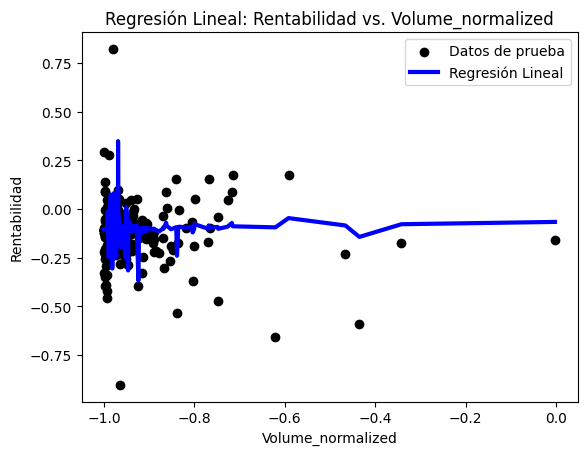

In [ ]:
# Seleccionar la característica 'Volume'
feature = 'Volume_normalized'

# Seleccionar la característica y ordenar los valores
X_feature = X_test[feature]
sorted_indices = X_feature.argsort()
X_feature_sorted = X_feature.iloc[sorted_indices]
y_test_sorted = y_test.iloc[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Visualizar el modelo lineal y los datos de prueba
plt.scatter(X_feature_sorted, y_test_sorted, color='black', label='Datos de prueba')
plt.plot(X_feature_sorted, y_pred_sorted, color='blue', linewidth=3, label='Regresión Lineal')
plt.xlabel(feature)
plt.ylabel('Rentabilidad')
plt.title('Regresión Lineal: Rentabilidad vs. ' + feature)
plt.legend()
plt.show()

Vamos a hacer una mascara para eliminar un outlier, con la condicion de que el volumen sea menor a 0.6

<function matplotlib.pyplot.ylabel(ylabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

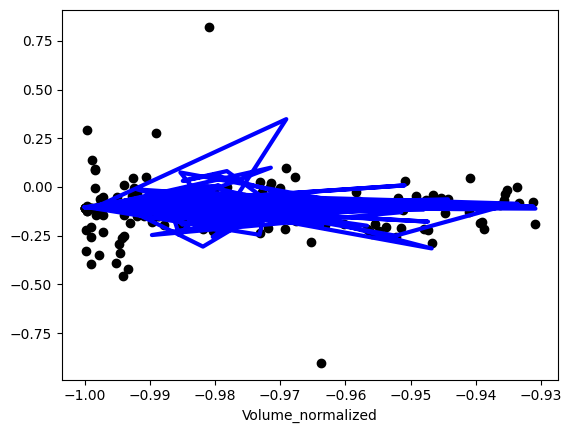

In [ ]:
# Seleccionar la característica 'Volume_normalized'
feature = 'Volume_normalized'

# Aplicar una máscara para eliminar los outliers en el rango de -1 a -0.93
mask = ((X_test[feature] >= -1) & (X_test[feature] < -0.93))
X_feature_masked = X_test[feature][mask]
y_test_masked = y_test[mask]
y_pred_masked = y_pred[mask]

# Visualizar el modelo lineal y los datos de prueba después de aplicar la máscara
plt.scatter(X_feature_masked, y_test_masked, color='black', label='Datos de prueba')
plt.plot(X_feature_masked, y_pred_masked, color='blue', linewidth=3, label='Regresión Lineal')
plt.xlabel(feature)
plt.ylabel

### GRIDSEARCH CV

In [ ]:
# Inicializa GridSearchCV con el modelo y los hiperparámetros definidos
grid_search = GridSearchCV(estimator=model, param_grid=param_grid_lr, scoring='neg_mean_squared_error', cv=cross_validation)

# Realiza el ajuste para encontrar los mejores hiperparámetros
grid_search.fit(X_train, y_train)

# Obtiene los mejores hiperparámetros encontrados
best_params_lr = grid_search.best_params_

In [ ]:
best_params_lr

{'copy_X': True, 'fit_intercept': False, 'n_jobs': None, 'positive': False}

Mean Squared Error: 0.015467954199821029


(array([  1.,   2.,   6.,  27., 232.,  29.,   4.,   0.,   0.,   1.]),
 array([-0.79445863, -0.62238254, -0.45030645, -0.27823036, -0.10615427,
         0.06592181,  0.2379979 ,  0.41007399,  0.58215008,  0.75422617,
         0.92630226]),
 <BarContainer object of 10 artists>)

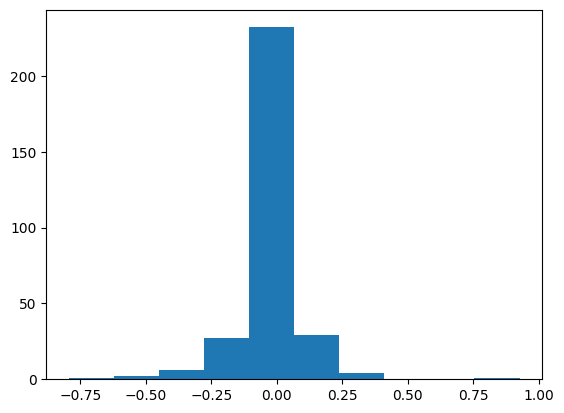

In [ ]:
# Utiliza los mejores hiperparámetros para inicializar el modelo
model = LinearRegression(**best_params_lr)

# Entrena el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evalúa el modelo
mse_test_RL_GS = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse_test_RL_GS}')
plt.hist(y_test - y_pred)

### Validación Cruzada Regresión Lineal

In [ ]:
# Crear y entrenar el modelo de regresión lineal con validación cruzada
model = LinearRegression()

# Realizar validación cruzada
scores = cross_val_score(model, X, y, cv=cross_validation, scoring='neg_mean_squared_error')

# Calcular el promedio del error cuadrático medio (MSE) negativo
mean_mse_RL_KV = -scores.mean()

# Calcular el promedio del coeficiente de determinación (R-squared)
mean_r2_RL = scores.mean()

print(f'Mean Squared Error: {mean_mse_RL_KV}')
print(f'Mean R-squared: {mean_r2_RL}')

Mean Squared Error: 0.014672508552835504
Mean R-squared: -0.014672508552835504


### Valor Residual

In [ ]:
# Calcular los residuos
residuals_test0 = y_test - y_pred

# Imprimir los primeros 10 valores residuales
print("Residuals:")
residuals_test0.head(10)

Residuals:


Date
2016-09-21    0.000575
2001-06-27    0.152627
2006-10-02   -0.097583
2016-03-21   -0.007854
2009-04-01    0.073396
2007-01-31    0.038593
2008-07-14   -0.093222
2000-09-21   -0.154678
2010-01-06    0.068203
2020-01-22   -0.008121
Name: Rentabilidad_normalized, dtype: float64

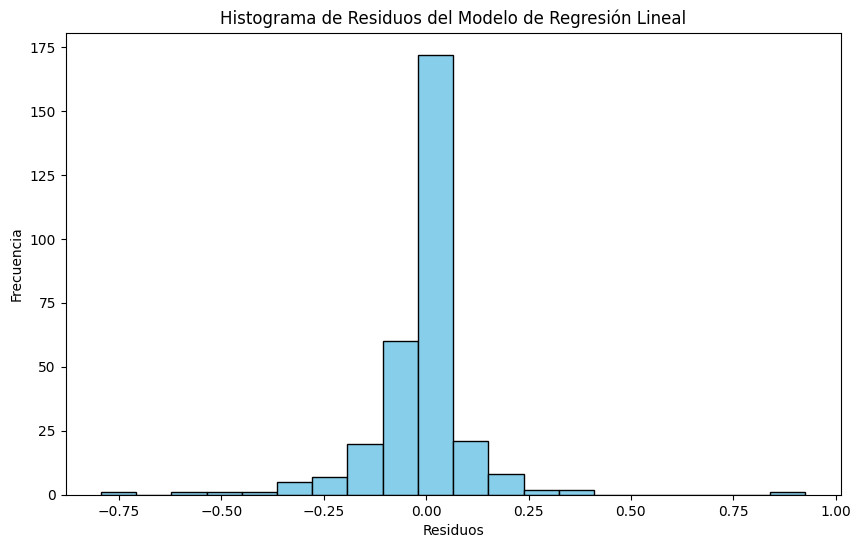

In [ ]:
# Calcular los residuos
residuals_test0 = y_test - y_pred

# Crear el histograma de los residuos
plt.figure(figsize=(10, 6))
plt.hist(residuals_test0, bins=20, color='skyblue', edgecolor='black')

# Añadir título y etiquetas
plt.title('Histograma de Residuos del Modelo de Regresión Lineal')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

## 3.2. Random Forest
Aunque el RF se especializa en problemas de clasificación, nosotros tenemos un problema de regresión, donde también nos puede ser útil.

In [ ]:
# Entrenar el modelo de Random Forest con los parámetros proporcionados
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, min_samples_leaf=2, n_estimators=500,
                      random_state=42)

### GRIDSEARCH CV

In [ ]:
# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid_rf,
                           cv=cross_validation, n_jobs=n_jobs, verbose=verbose)

# Ejecutar GridSearchCV en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros
print("Mejores parámetros encontrados:", grid_search.best_params_)

'\n# sirve para calcular los parámetros óptimos con los que entrenar a nuestro modelo\n# Definir los parámetros para GridSearchCV\nparam_grid_rf = {\n    \'n_estimators\': [100, 200, 300, 500],\n    \'max_depth\': [3, 5, 7, 10, None],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 2, 4],\n    \'bootstrap\': [True, False]\n}\n\n# Configurar GridSearchCV\ngrid_search = GridSearchCV(estimator=rf, param_grid=param_grid_rf,\n                           cv=cross_validation, n_jobs=n_jobs, verbose=verbose)\n\n# Ejecutar GridSearchCV en los datos de entrenamiento\ngrid_search.fit(X_train, y_train)\n\n# Mostrar los mejores parámetros\nprint("Mejores parámetros encontrados:", grid_search.best_params_)\n'

In [ ]:
# Realizar predicciones en los conjuntos de entrenamiento y prueba
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Calcular el error cuadrático medio para cada conjunto
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test_RF_GS = mean_squared_error(y_test, y_test_pred)

# Calcular el coeficiente de determinación (R^2) para cada conjunto
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Métricas del conjunto de entrenamiento:")
print("Error cuadrático medio (MSE):", mse_train)
print("Coeficiente de determinación (R^2):", r2_train)

print("\nMétricas del conjunto de prueba:")
print("Error cuadrático medio (MSE):", mse_test_RF_GS)
print("Coeficiente de determinación (R^2):", r2_test)

Métricas del conjunto de entrenamiento:
Error cuadrático medio (MSE): 0.01336846907215809
Coeficiente de determinación (R^2): 0.0739610001179204

Métricas del conjunto de prueba:
Error cuadrático medio (MSE): 0.016456670119846334
Coeficiente de determinación (R^2): 0.0468082355466759


Aquí vamos a visualizar nuestras métricas vs los valores reales

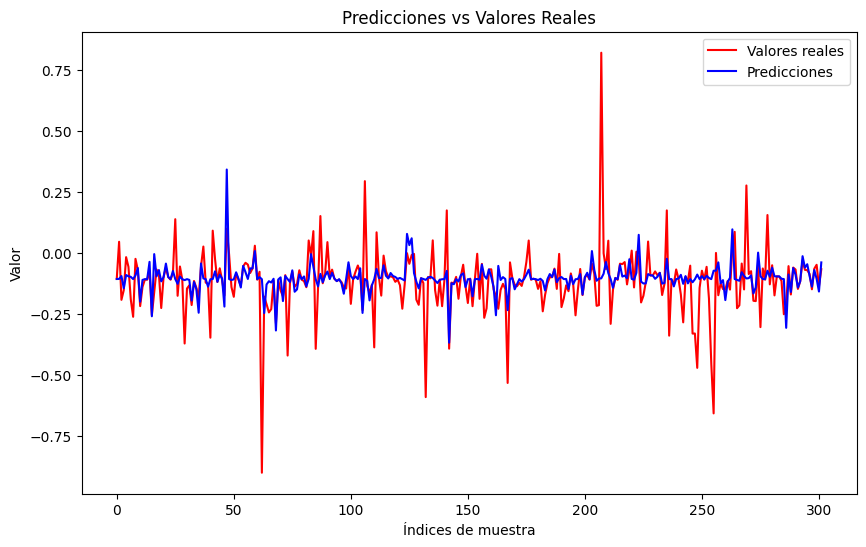

In [ ]:
# Crear un rango de índices para los puntos de datos
indices = range(len(y_test))

# Graficar las predicciones vs los valores reales en el conjunto de prueba
plt.figure(figsize=(10, 6))
plt.plot(indices, y_test, color='red', label='Valores reales')
plt.plot(indices, y_pred, color='blue', label='Predicciones')
plt.xlabel('Índices de muestra')
plt.ylabel('Valor')
plt.title('Predicciones vs Valores Reales')
plt.legend()
plt.show()

###  Validación cruzada Random Forest

In [ ]:
# Realizar validación cruzada para MSE
cv_scores_mse = cross_val_score(rf, X_train, y_train, cv=cross_validation, scoring='neg_mean_squared_error')

# Convertir los puntajes negativos de MSE a positivos y calcular el promedio
mse_scores = -cv_scores_mse
mean_mse_RF_KV = mse_scores.mean()

# Imprimir el resultado del MSE
print(f'Mean Squared Error (MSE) after 5-fold cross validation: {mean_mse_RF_KV}')

# Realizar validación cruzada para R2
cv_scores_r2 = cross_val_score(rf, X_train, y_train, cv=cross_validation, scoring='r2')

# Calcular el promedio del coeficiente de determinación R2
mean_r2_RF = cv_scores_r2.mean()

# Imprimir el resultado de R2
print(f'Mean R-squared (R2) after 5-fold cross validation: {mean_r2_RF}')

Mean Squared Error (MSE) after 5-fold cross validation: 0.014179697144689762
Mean R-squared (R2) after 5-fold cross validation: 0.018354525522752185


### Valor Residual

In [ ]:
# Calcular los residuos en el conjunto de entrenamiento
# residuals_train = y_train - y_train_pred

# Calcular los residuos en el conjunto de prueba
residuals_test1 = y_test - y_test_pred

# Imprimir los primeros 10 valores residuales del conjunto de prueba
print("Residuals del conjunto de prueba:")
print(residuals_test1[:10])

Residuals del conjunto de prueba:
Date
2016-09-21    0.000359
2001-06-27    0.134080
2006-10-02   -0.102500
2016-03-21   -0.045960
2009-04-01    0.088733
2007-01-31    0.049386
2008-07-14   -0.089684
2000-09-21   -0.156957
2010-01-06    0.082346
2020-01-22    0.036739
Name: Rentabilidad_normalized, dtype: float64


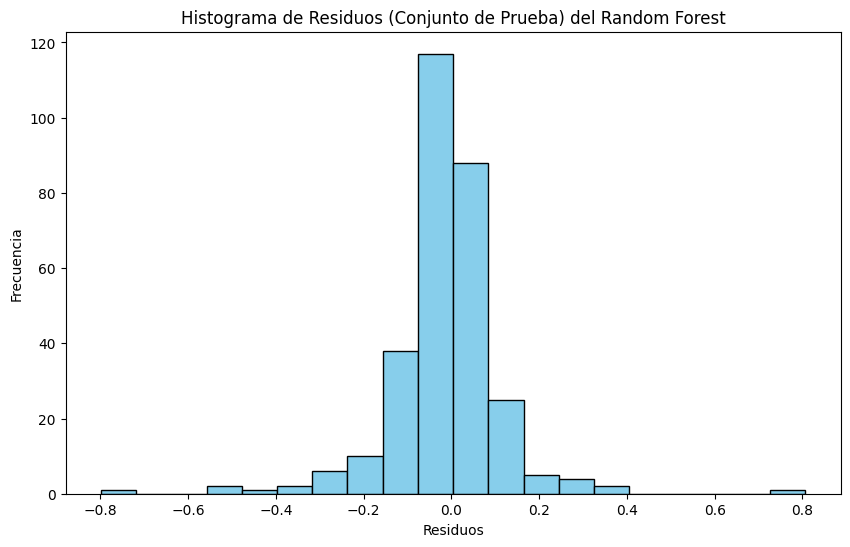

In [ ]:
# Calcular los residuos en el conjunto de prueba
# residuals_test1 = y_test - y_test_pred

# Crear histograma de los residuos en el conjunto de prueba
plt.figure(figsize=(10, 6))
plt.hist(residuals_test1, bins=20, color='skyblue', edgecolor='black')

# Añadir título y etiquetas
plt.title('Histograma de Residuos (Conjunto de Prueba) del Random Forest')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

## 3.3. LightGMB

In [ ]:
# Crear un conjunto de datos LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# Entrenar el modelo LightGBM
bst = lgb.train(params_lgmb, train_data, num_round, valid_sets=[test_data])

# Realizar predicciones en el conjunto de prueba
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)

# Evaluar el rendimiento del modelo
mse_test_GMB_GS = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse_test_GMB_GS)

Error cuadrático medio (MSE): 0.013941778103882696


### Gridsearch CV

In [1]:
# Crear un modelo LightGBM
lgb_model = lgb.LGBMRegressor()

# Crear un objeto GridSearchCV
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid_lgmb, scoring='neg_mean_squared_error', cv=cross_validation)

# Realizar la búsqueda en la cuadrícula utilizando los datos de entrenamiento
grid_search.fit(X_train, y_train)

" # Crear un modelo LightGBM\nlgb_model = lgb.LGBMRegressor()\n\n# Crear un objeto GridSearchCV\ngrid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid_lgmb, scoring='neg_mean_squared_error', cv=cross_validation)\n\n# Realizar la búsqueda en la cuadrícula utilizando los datos de entrenamiento\ngrid_search.fit(X_train, y_train) "

In [ ]:
 grid_search.best_params_

{'copy_X': True, 'fit_intercept': False, 'n_jobs': None, 'positive': False}

### Validación Cruzada LightGMB


In [ ]:
# Crear un conjunto de datos LightGBM para el conjunto de entrenamiento
train_data = lgb.Dataset(X_train, label=y_train)

# Definir los parámetros del modelo. Ya están definidos arriba. Linea 19.
''' params = {
    'objective': 'regression',
    'metric': 'mse',
    'num_leaves': 20,
    'learning_rate': 0.05,
    'n_estimators': 50,
    'reg_alpha': 0.1,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1  # Desactiva todas las advertencias (warnings)
}
 '''
# Crear el modelo LightGBM
model = lgb.LGBMRegressor(**params_lgmb)

# Realizar la validación cruzada para MSE
cv_scores_mse = cross_val_score(model, X_train, y_train, cv=cross_validation, scoring='neg_mean_squared_error')

# Convertir los puntajes negativos de MSE a positivos y calcular el promedio
mse_scores = -cv_scores_mse
mean_mse_GMB_KV = mse_scores.mean()

# Imprimir el resultado del MSE
print(f'Mean Squared Error (MSE) after 5-fold cross validation: {mean_mse_GMB_KV}')

# Realizar la validación cruzada para R2
cv_scores_r2 = cross_val_score(model, X_train, y_train, cv=cross_validation, scoring='r2')

# Calcular el promedio del coeficiente de determinación R2
mean_r2_GMB = cv_scores_r2.mean()

# Imprimir el resultado de R2
print(f'Mean R-squared (R2) after 5-fold cross validation: {mean_r2_GMB}')

Mean Squared Error (MSE) after 5-fold cross validation: 0.012099270177574175
Mean R-squared (R2) after 5-fold cross validation: 0.16156588862812998


### Valor Residual

In [ ]:
# Calcular los residuos en el conjunto de entrenamiento
# residuals_train = y_train - y_train_pred

# Calcular los residuos en el conjunto de prueba
residuals_test2 = y_test - y_pred

# Imprimir los primeros 10 valores residuales del conjunto de prueba
print("Residuals del conjunto de prueba:")
print(residuals_test2[:10])

Residuals del conjunto de prueba:
Date
2016-09-21    0.002913
2001-06-27    0.133636
2006-10-02   -0.079677
2016-03-21   -0.043407
2009-04-01    0.093912
2007-01-31    0.031192
2008-07-14   -0.008431
2000-09-21   -0.151063
2010-01-06    0.083280
2020-01-22    0.040009
Name: Rentabilidad_normalized, dtype: float64


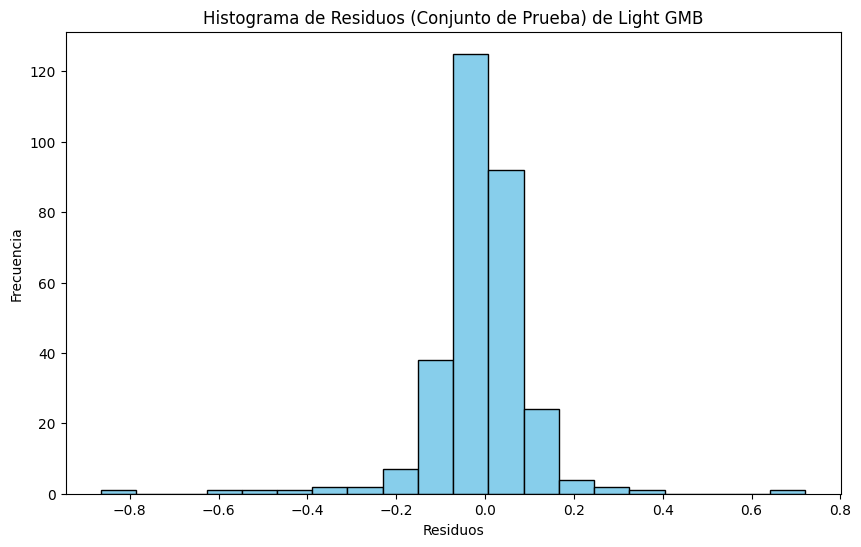

In [ ]:
# Calcular los residuos en el conjunto de prueba
residuals_test2 = y_test - y_pred

# Crear histograma de los residuos en el conjunto de prueba
plt.figure(figsize=(10, 6))
plt.hist(residuals_test2, bins=20, color='skyblue', edgecolor='black')

# Añadir título y etiquetas
plt.title('Histograma de Residuos (Conjunto de Prueba) de Light GMB')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

## 3.4.XGBOOST

In [ ]:
# Crear el modelo XGBoost
model = xgb.XGBRegressor()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir los valores de rentabilidad normalizados en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el MSE
mse = mean_squared_error(y_test, y_pred)

print("El Mean Squared Error (MSE) es:", mse)
print(y_pred)

El Mean Squared Error (MSE) es: 0.00894098167494548
[-0.12085643  0.05397481 -0.14996053 -0.1382154  -0.06461307 -0.0876393
 -0.12878294 -0.29728305 -0.06868961 -0.09033549 -0.13507234 -0.11554019
 -0.10852333 -0.10893438 -0.09513716 -0.26271784 -0.19718824 -0.07000492
 -0.12193024 -0.15317142 -0.09455456 -0.04670213 -0.05522071 -0.10108727
 -0.09490559  0.00226518 -0.14990205 -0.09613523 -0.10517249 -0.2666405
 -0.15530865 -0.12022202 -0.17295972 -0.12037278 -0.12366857 -0.13869144
 -0.06957582 -0.0457134  -0.12812874 -0.10946918 -0.33026043  0.00796388
 -0.11549366 -0.09553163 -0.09094682 -0.09207923 -0.13964841 -0.07162292
 -0.00919444 -0.11028946 -0.19536373 -0.09197695 -0.14728795 -0.12265449
 -0.06872293 -0.06367812 -0.10679191 -0.08717272 -0.10002962  0.01815355
 -0.10940764 -0.05599744 -0.03256062 -0.14180775 -0.06314326 -0.18721661
 -0.10275003 -0.09756356 -0.19494498 -0.11465448 -0.09732761 -0.1050476
 -0.08738218 -0.33774295 -0.10137756 -0.09854535 -0.13966607 -0.09513716
 -

### 3.4.1 grid search

In [ ]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid_xgb, cv=verbose, n_jobs=n_jobs, scoring='neg_mean_squared_error')

# Ejecutar la búsqueda de cuadrícula en los datos de entrenamiento con una barra de progreso
with tqdm(total=len(param_grid_xgb['n_estimators']) * len(param_grid_xgb['max_depth']) * len(param_grid_xgb['learning_rate']) * len(param_grid_xgb['subsample']) * len(param_grid_xgb['colsample_bytree']) * len(param_grid_xgb['gamma'])) as pbar:
    grid_search.fit(X_train, y_train)
    pbar.update(1)

# Obtener los mejores hiperparámetros encontrados
best_params_xgb = grid_search.best_params_
print("Los mejores hiperparámetros encontrados son:", best_params_xgb)

# Utilizar el modelo con los mejores hiperparámetros para hacer predicciones
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

  0%|          | 1/1296 [05:24<116:39:52, 324.32s/it]

Los mejores hiperparámetros encontrados son: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 300, 'subsample': 0.7}


### 3.4.3. validacion cruzada



In [ ]:
# Crear el modelo XGBoost
model = xgb.XGBRegressor(**best_params_xgb)

# Realizar la validación cruzada
mse_scores = cross_val_score(model, X_train, y_train, cv=cross_validation, scoring='neg_mean_squared_error')

# Convertir los puntajes de MSE negativos a positivos
mse_scores = -mse_scores

# Calcular el MSE promedio y la desviación estándar
mean_mse_XGB_KV = mse_scores.mean()

print("Resultados de validación cruzada:")
print("Mean Squared Error (MSE) promedio:", mean_mse_XGB_KV)

mse_test_XGB_GS = mean_squared_error(y_test, y_pred)
print("El Mean Squared Error (MSE) utilizando los mejores hiperparámetros es:", mse_test_XGB_GS)

'''

# Crear el modelo LightGBM
model = lgb.LGBMRegressor(**params_lgmb)

# Realizar la validación cruzada para MSE
cv_scores_mse = cross_val_score(model, X_train, y_train, cv=cross_validation, scoring='neg_mean_squared_error')

# Convertir los puntajes negativos de MSE a positivos y calcular el promedio
mse_scores = -cv_scores_mse
mean_mse_GMB_KV = mse_scores.mean()

# Imprimir el resultado del MSE
print(f'Mean Squared Error (MSE) after 5-fold cross validation: {mean_mse_GMB_KV}')

# Realizar la validación cruzada para R2
cv_scores_r2 = cross_val_score(model, X_train, y_train, cv=cross_validation, scoring='r2')

# Calcular el promedio del coeficiente de determinación R2
mean_r2_GMB = cv_scores_r2.mean()

# Imprimir el resultado de R2
print(f'Mean R-squared (R2) after 5-fold cross validation: {mean_r2_GMB}') '''

Resultados de validación cruzada:
Mean Squared Error (MSE) promedio: 0.0076506818901633635
El Mean Squared Error (MSE) utilizando los mejores hiperparámetros es: 0.010496027749429418


"\n\n# Crear el modelo LightGBM\nmodel = lgb.LGBMRegressor(**params_lgmb)\n\n# Realizar la validación cruzada para MSE\ncv_scores_mse = cross_val_score(model, X_train, y_train, cv=cross_validation, scoring='neg_mean_squared_error')\n\n# Convertir los puntajes negativos de MSE a positivos y calcular el promedio\nmse_scores = -cv_scores_mse\nmean_mse_GMB_KV = mse_scores.mean()\n\n# Imprimir el resultado del MSE\nprint(f'Mean Squared Error (MSE) after 5-fold cross validation: {mean_mse_GMB_KV}')\n\n# Realizar la validación cruzada para R2\ncv_scores_r2 = cross_val_score(model, X_train, y_train, cv=cross_validation, scoring='r2')\n\n# Calcular el promedio del coeficiente de determinación R2\nmean_r2_GMB = cv_scores_r2.mean()\n\n# Imprimir el resultado de R2\nprint(f'Mean R-squared (R2) after 5-fold cross validation: {mean_r2_GMB}') "

### 3.4.4. valor residual

In [ ]:
# Dividir el DataFrame completo en características (X) y la variable objetivo (y)
# X = df_it.drop(["Rentabilidad","Rentabilidad_normalized","Close","Volume"], axis=1)
# y = df_it["Rentabilidad_normalized"]

# Dividir los datos en conjuntos de entrenamiento y prueba
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_seed)
'''
# Crear y entrenar el modelo XGBoost con los mejores hiperparámetros encontrados
best_model = xgb.XGBRegressor(learning_rate=best_params_xgb['learning_rate'],
                               max_depth=best_params_xgb['max_depth'],
                               n_estimators=best_params_xgb['n_estimators'],
                               subsample=best_params_xgb['subsample'],
                               gamma=best_params_xgb['gamma'],
                               colsample_bytree=best_params_xgb['colsample_bytree'])
best_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)
 '''
# Calcular los residuos
residuals_test3 = y_test - y_pred
print(residuals_test3[:10])

Date
2016-09-21    0.016589
2001-06-27    0.000919
2006-10-02   -0.033099
2016-03-21   -0.035004
2009-04-01    0.068217
2007-01-31    0.019273
2008-07-14   -0.056559
2000-09-21    0.169226
2010-01-06    0.011474
2020-01-22    0.010853
Name: Rentabilidad_normalized, dtype: float64


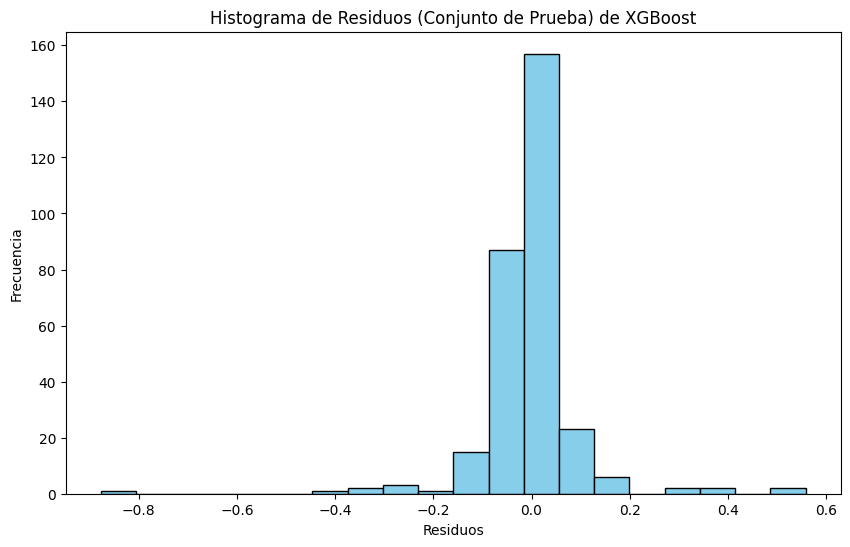

In [ ]:
# Crear histograma de los residuos en el conjunto de prueba (residuals_test3)
plt.figure(figsize=(10, 6))
plt.hist(residuals_test3, bins=20, color='skyblue', edgecolor='black')

# Añadir título y etiquetas
plt.title('Histograma de Residuos (Conjunto de Prueba) de XGBoost')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

# 4. RESULTADO DE LA COMPARACIÓN DE LOS MODELOS:

In [ ]:
'''
En el LightGMB, el MSE despues de la validacion cruzada (0.004012523386813407) es menor que cuando realizamos el gridsearch (0.005202726655911077), por lo que nos quedariamos
con el de Validación Cruzada.
'''
print(f'MSE RL GRIDSEARCH {mse_test_RL_GS}')
print(f'MSE RL VALIDACION {mean_mse_RL_KV}')
print()
'''
En el LightGMB, el MSE despues de la validacion cruzada (0.004068916719098916) es menor que cuando realizamos el gridsearch (0.005617624942031694), por lo que nos quedariamos
con el de Validación Cruzada.
'''
print(f'MSE RF GRIDSEARCH {mse_test_RF_GS}')
print(f'MSE RF VALIDACION {mean_mse_RF_KV}')
print()
'''
En el LightGMB, el MSE despues de la validacion cruzada (0.0038537084923566667) es menor que cuando realizamos el gridsearch (0.004761497669264618), por lo que nos quedariamos
con el de Validación Cruzada.
'''
print(f'MSE GMB GRIDSEARCH {mse_test_GMB_GS}')
print(f'MSE GMB VALIDACION {mean_mse_GMB_KV}')
print()
'''
En el XGBoost, el MSE despues de la validacion cruzada (0.004844710340393013) es menor que cuando realizamos el gridsearch (0.0050089901096838215), por lo que nos quedariamos
con el de Validación Cruzada.
'''
print(f'MSE XGB GRIDSEARCH {mse_test_XGB_GS}')
print(f'MSE XGB VALIDACION {mean_mse_XGB_KV}')
print()

MSE RL GRIDSEARCH 0.015467954199821029
MSE RL VALIDACION 0.014672508552835504

MSE RF GRIDSEARCH 0.016456670119846334
MSE RF VALIDACION 0.014179697144689762

MSE GMB GRIDSEARCH 0.013941778103882696
MSE GMB VALIDACION 0.012099270177574175

MSE XGB GRIDSEARCH 0.010496027749429418
MSE XGB VALIDACION 0.0076506818901633635



In [ ]:
print(f'MSE RL GRIDSEARCH {mse_test_RL_GS}')
print()
print(f'MSE RF GRIDSEARCH {mse_test_RF_GS}')
print()
print(f'MSE GMB GRIDSEARCH {mse_test_GMB_GS}')
print()
print(f'MSE XGB GRIDSEARCH {mse_test_XGB_GS}')
print()

MSE RL GRIDSEARCH 0.015467954199821029

MSE RF GRIDSEARCH 0.016456670119846334

MSE GMB GRIDSEARCH 0.013941778103882696

MSE XGB GRIDSEARCH 0.010496027749429418



Nos quedaríamos con el modelo de LightGMB despues de realizar la validación cruzada, es el que menor MSE nos proporciona.


## PLOTS

Debemos realizar plots de los mejores resultados de cada modelo que son los de validación cruzada:
- mean_mse_RL_KV
- mean_mse_RF_KV
- mean_mse_GMB_KV
- mean_mse_XGB_KV

Al ser el error, tenemos que quedarnos con el que menor cantidad dé, esto significa que nos quedaremos con la barra más pequeña

Habría que añadir otro resultado, el cual sería el resultado del modelo nuevo que nos indicaría hacer Roberto

Para aumentar la diferencia vertical en el eje y y resaltar las disparidades entre los valores, aplicamos una transformación logarítmica al eje y.


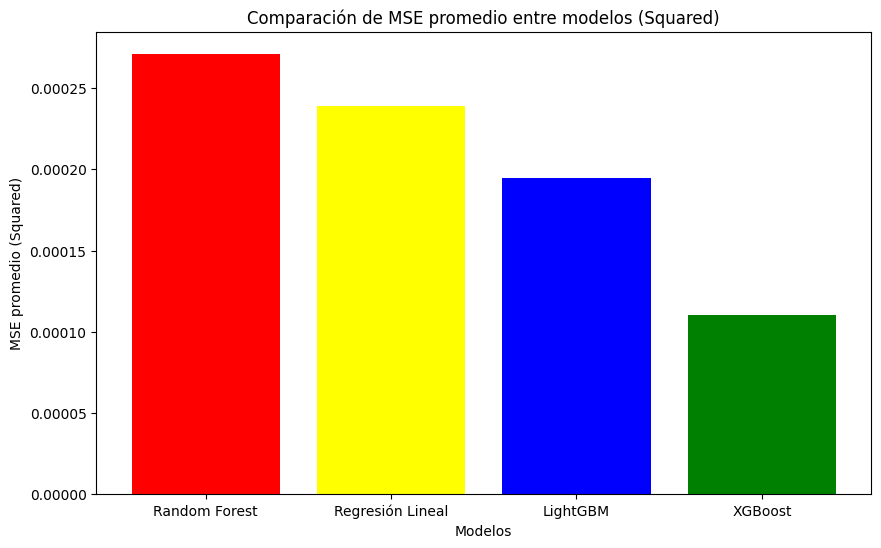

In [ ]:
# Valores de las variables
means = [mse_test_RF_GS, mse_test_RL_GS, mse_test_GMB_GS, mse_test_XGB_GS]

labels = ['Random Forest', 'Regresión Lineal', 'LightGBM', 'XGBoost']

# Elevar al cuadrado los valores para amplificar las diferencias
means_squared = [val ** 2 for val in means]

# Crear el diagrama de barras con los valores al cuadrado
plt.figure(figsize=(10, 6))
plt.bar(labels, means_squared, color=['red', 'yellow', 'blue', 'green'])
plt.title('Comparación de MSE promedio entre modelos (Squared)')
plt.xlabel('Modelos')
plt.ylabel('MSE promedio (Squared)')
plt.show()

Ploteo del Valor Residual de los 3 modelos

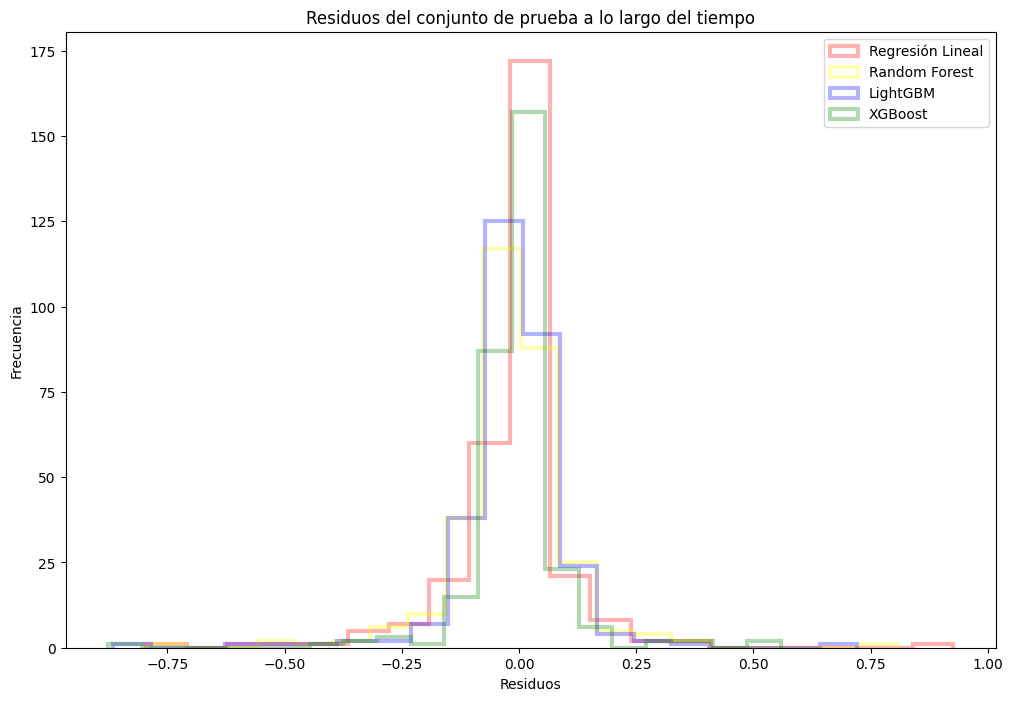

In [ ]:
plt.figure(figsize=(12, 8))

# Plotear los residuos para cada conjunto de prueba con colores transparentes, sin relleno y con grosor de línea aumentado
plt.hist(residuals_test0, bins=20, color='red', label='Regresión Lineal', alpha=0.3, histtype='step', linewidth=3)
plt.hist(residuals_test1, bins=20, color='yellow', label='Random Forest', alpha=0.3, histtype='step', linewidth=3)
plt.hist(residuals_test2, bins=20, color='blue', label='LightGBM', alpha=0.3, histtype='step', linewidth=3)
plt.hist(residuals_test3, bins=20, color='green', label='XGBoost', alpha=0.3, histtype='step', linewidth=3)

plt.title('Residuos del conjunto de prueba a lo largo del tiempo')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# 5. MODELO FINAL (INCLUYE BINARIZACION)


## Descarga de Datos

In [ ]:
df = data.copy()

In [ ]:
columnas_binarizar = ['Open', 'High', 'Low', 'Close','Rentabilidad','Volume_normalized','Rentabilidad_normalized','Adj Close','Volume']
for columna in columnas_binarizar:
    df[columna] = (df[columna].shift(1) < df[columna]).astype(int)

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Rentabilidad,Volume_normalized,Rentabilidad_normalized
Date,,,,,,,,,
2000-01-04,0,0,0,0,0,0,0,0,0
2000-01-05,0,0,0,0,0,0,1,0,1
2000-01-06,0,0,0,1,1,1,1,1,1
2000-01-07,0,1,0,0,0,1,0,1,0
2000-01-10,1,0,1,1,1,1,0,1,0


In [ ]:
# Esta vale para chequear si está o no bien.
data.head()

,Open,High,Low,Close,Adj Close,Volume,Rentabilidad,Volume_normalized,Rentabilidad_normalized
Date,,,,,,,,,
2000-01-04,0.044922,0.045573,0.042969,0.042969,0.042969,2438400,-4.347540,-0.991002,-0.319478
2000-01-05,0.044271,0.045573,0.042969,0.042969,0.042969,1430400,-2.940977,-0.994722,-0.251578
2000-01-06,0.043294,0.044271,0.042969,0.044271,0.044271,2400000,2.256660,-0.991144,-0.000665
2000-01-07,0.043294,0.046875,0.042969,0.043294,0.043294,5251200,0.000000,-0.980622,-0.109604
2000-01-10,0.043945,0.044271,0.043294,0.043620,0.043620,6307200,-0.739556,-0.976725,-0.145306


In [ ]:
''' # Seleccionar el rango de fechas para el IT
it_start_date = start_date
it_end_date = end  # Ajusta las fechas según tus necesidades
 '''
# Seleccionar los datos para el IT
df_it_normalizado = data.loc[(data.index >= it_start_date) & (data.index <= it_end_date)]

# Dividir el DataFrame en características (X) y la variable objetivo (y)
X = df_it_normalizado.drop(["Rentabilidad","Rentabilidad_normalized","Close","Volume"], axis=1)
y = df_it_normalizado["Rentabilidad_normalized"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=test_size_0_2, random_state=random_seed)

# Dividir los datos temporales en conjuntos de validación y prueba
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_val, random_state=random_seed)

# Imprimir el número de filas en cada conjunto
print("IT DataSet has {} rows".format(len(df_it)))
print("X_train has {} rows".format(len(X_train)))
print("X_val has {} rows".format(len(X_val)))
print("X_test has {} rows".format(len(X_test)))

IT DataSet has 6036 rows
X_train has 4828 rows
X_val has 604 rows
X_test has 604 rows


## En esta celda siguiente, probamos el test

In [ ]:
# Supongamos que ya tienes los conjuntos X_train, X_val, X_test, y_train, y_val, y_test
# Definir los hiperparámetros que deseas ajustar
# Crear el modelo XGBoost
model = xgb.XGBRegressor()

# Inicializar la búsqueda de cuadrícula
grid_search = GridSearchCV(estimator=model, param_grid=param_grid_xgb, cv=cross_validation, n_jobs= n_jobs, scoring='neg_mean_squared_error')

# Ejecutar la búsqueda de cuadrícula en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print("Los mejores hiperparámetros encontrados son:", best_params)

# Utilizar el modelo con los mejores hiperparámetros para hacer predicciones
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calcular el MSE utilizando el mejor modelo
mse_test_XGB_GS = mean_squared_error(y_test, y_pred)
print("El Mean Squared Error (MSE) utilizando los mejores hiperparámetros es:", mse_test_XGB_GS)

best_model = grid_search.best_estimator_
next_day_prediction = best_model.predict(X_test)

# Hacer la predicción para el siguiente día
print("La predicción para el siguiente día es:", next_day_prediction[0])

# Desnormalizar la predicción
scaler = MinMaxScaler(feature_range=(-1, 1))
# Ajustar el escalador a los valores originales de y_train (esto debería haberse hecho previamente)
scaler.fit(y_train.values.reshape(-1, 1))

# Desnormalizar la predicción
next_day_prediction_descaled = scaler.inverse_transform(next_day_prediction.reshape(-1, 1))[0][0]
print("La predicción desnormalizada para el siguiente día es:", next_day_prediction_descaled)

Los mejores hiperparámetros encontrados son: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.15, 'max_depth': 6, 'n_estimators': 300, 'subsample': 0.8}
El Mean Squared Error (MSE) utilizando los mejores hiperparámetros es: 0.011179496549886599
La predicción para el siguiente día es: -0.1099215
La predicción desnormalizada para el siguiente día es: -0.18274453


## Aqui vamos a probar la validación, convirtiendo el test en datos de entrenamiento también

In [ ]:
# Supongamos que ya tienes los conjuntos X_train, X_val, X_test, y_train, y_val, y_test
# Concatenar X_train y X_test para usar todo el conjunto de entrenamiento
X_full_train = pd.concat([X_train, X_test])
y_full_train = pd.concat([y_train, y_test])

# Crear el modelo XGBoost
model = xgb.XGBRegressor()

# Inicializar la búsqueda de cuadrícula
grid_search = GridSearchCV(estimator=model, param_grid=param_grid_xgb, cv=cross_validation, n_jobs=n_jobs, scoring='neg_mean_squared_error')

# Ejecutar la búsqueda de cuadrícula en los datos de entrenamiento completo
grid_search.fit(X_full_train, y_full_train)

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print("Los mejores hiperparámetros encontrados son:", best_params)

# Utilizar el modelo con los mejores hiperparámetros para hacer predicciones en el conjunto de validación
best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val)

# Calcular el MSE utilizando el mejor modelo en el conjunto de validación
mse_val_XGB_GS = mean_squared_error(y_val, y_val_pred)
print("El Mean Squared Error (MSE) en el conjunto de validación es:", mse_val_XGB_GS)

best_model = grid_search.best_estimator_
next_day_val_prediction = best_model.predict(X_val)
print("La predicción normalizada para el siguiente día en el conjunto de validación es:", next_day_val_prediction[0])

# Desnormalizar la predicción
# Ajustar el escalador a los valores originales de y_full_train (esto debería haberse hecho previamente)
scaler = MinMaxScaler(feature_range=(-1, 1))
y_full_train_reshaped = y_full_train.values.reshape(-1, 1)  # Asegúrate de que los datos están en el formato correcto
scaler.fit(y_full_train_reshaped)

# Desnormalizar la predicción
next_day_val_prediction_reshaped = next_day_val_prediction.reshape(-1, 1)
next_day_val_prediction_descaled = scaler.inverse_transform(next_day_val_prediction_reshaped)[0][0]
print("La predicción desnormalizada para el siguiente día en el conjunto de validación es:", next_day_val_prediction_descaled)

Los mejores hiperparámetros encontrados son: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 300, 'subsample': 0.9}
El Mean Squared Error (MSE) en el conjunto de validación es: 0.005256006809059262
La predicción normalizada para el siguiente día en el conjunto de validación es: -0.21298808
La predicción desnormalizada para el siguiente día en el conjunto de validación es: -0.21298808


## División Binarizado

In [ ]:
# Seleccionar los datos para el IT
df_it_binarizado = df.loc[(df.index >= it_start_date) & (df.index <= it_end_date)]

# Dividir el DataFrame en características (X) y la variable objetivo (y)
X = df_it_binarizado.drop(["Rentabilidad", "Rentabilidad_normalized", "Close", "Volume"], axis=1)
y = df_it_binarizado["Rentabilidad_normalized"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=test_size_0_2, random_state=random_seed)

# Dividir los datos temporales en conjuntos de validación y prueba
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_val, random_state=random_seed)

# Imprimir el número de filas en cada conjunto
print("IT DataSet has {} rows".format(len(df_it)))
print("X_train has {} rows".format(len(X_train)))
print("X_val has {} rows".format(len(X_val)))
print("X_test has {} rows".format(len(X_test)))

IT DataSet has 6036 rows
X_train has 4828 rows
X_val has 604 rows
X_test has 604 rows


## Aqui vamos a probar el test del Binarizado

In [ ]:
# Supongamos que ya tienes los conjuntos X_train, X_val, X_test, y_train, y_val, y_test
# Definir los hiperparámetros que deseas ajustar

# Crear el modelo XGBoost
model = xgb.XGBRegressor()

# Inicializar la búsqueda de cuadrícula
grid_search = GridSearchCV(estimator=model, param_grid=param_grid_xgb, cv=cross_validation, n_jobs=n_jobs, scoring='neg_mean_squared_error')

# Ejecutar la búsqueda de cuadrícula en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print("Los mejores hiperparámetros encontrados son:", best_params)

# Utilizar el modelo con los mejores hiperparámetros para hacer predicciones
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calcular el MSE utilizando el mejor modelo
mse_test_XGB_GS = mean_squared_error(y_test, y_pred)
print("El Mean Squared Error (MSE) utilizando los mejores hiperparámetros es:", mse_test_XGB_GS)

best_model = grid_search.best_estimator_
next_day_prediction = best_model.predict(X_test)
print("La predicción para el siguiente día es:", next_day_prediction[0])

Los mejores hiperparámetros encontrados son: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 300, 'subsample': 0.8}
El Mean Squared Error (MSE) utilizando los mejores hiperparámetros es: 0.001781513121440698
La predicción para el siguiente día es: -0.26222447


In [ ]:
''' # Suponiendo que ya tienes las predicciones (y_pred) y los valores reales (y_test)
# Calcular el AUC y la curva de ROC
roc_auc = roc_auc_score(y_test, y_pred)
print(f'AUC: {roc_auc:.2f}')

# Calcular la curva de ROC
fpr, tpr, _ = roc_curve(y_test, y_pred)

# Graficar la curva de ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show() '''

ValueError: continuous format is not supported

In [ ]:
# Convertir las predicciones continuas en clases binarias
y_pred_binary = np.where(y_pred > threshold_non_scaled, 1, 0)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_binary)

print("Matriz de Confusión:")
print(conf_matrix)

# Calcular verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos
true_positives = conf_matrix[1, 1]
true_negatives = conf_matrix[0, 0]
false_positives = conf_matrix[0, 1]
false_negatives = conf_matrix[1, 0]
print('\n')
# Imprimir los resultados
print("Verdaderos Positivos:", true_positives)
print("Verdaderos Negativos:", true_negatives)
print("Falsos Positivos:", false_positives)
print("Falsos Negativos:", false_negatives)
print('\n')
# Calcular el accuracy
accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)
print("Accuracy:", accuracy)
accuracy_percentage = accuracy * 100
print("Accuracy (%):", f"{accuracy_percentage:.2f}")
# Calcular la precisión
precision = true_positives / (true_positives + false_positives)
print("Precision:", precision)
precision_percentage = precision * 100
print("Precision (%):", f"{precision_percentage:.2f}")
# Calcular el recall (sensibilidad)
recall = true_positives / (true_positives + false_negatives)
print("Recall (Sensibilidad):", recall)
recall_percentage = recall * 100
print("Recall (Sensibilidad) (%):", f"{recall_percentage:.2f}")
# Calcular la especificidad
specificity = true_negatives / (true_negatives + false_positives)
print("Specificity:", specificity)
specificity_percentage = specificity * 100
print("Specificity (%):", f"{specificity_percentage:.2f}")

## Aqui probamos la validación del Binarizado, convirtiendo los datos de test en datos de entrenamiento también

In [ ]:
# Supongamos que ya tienes los conjuntos X_train, X_val, X_test, y_train, y_val, y_test
# Concatenar X_train y X_test para usar todo el conjunto de entrenamiento
X_full_train = pd.concat([X_train, X_test])
y_full_train = pd.concat([y_train, y_test])

# Crear el modelo XGBoost
model = xgb.XGBRegressor()

# Inicializar la búsqueda de cuadrícula
grid_search = GridSearchCV(estimator=model, param_grid=param_grid_xgb, cv=cross_validation, n_jobs=n_jobs, scoring='neg_mean_squared_error')

# Ejecutar la búsqueda de cuadrícula en los datos de entrenamiento completo
grid_search.fit(X_full_train, y_full_train)

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print("Los mejores hiperparámetros encontrados son:", best_params)

# Utilizar el modelo con los mejores hiperparámetros para hacer predicciones en el conjunto de validación
best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val)

# Calcular el MSE utilizando el mejor modelo en el conjunto de validación
mse_val_XGB_GS = mean_squared_error(y_val, y_val_pred)
print("El Mean Squared Error (MSE) en el conjunto de validación es:", mse_val_XGB_GS)

best_model = grid_search.best_estimator_
next_day_val_prediction = best_model.predict(X_val)

print("La predicción normalizada para el siguiente día en el conjunto de validación es:", next_day_val_prediction[0])

Los mejores hiperparámetros encontrados son: {'colsample_bytree': 1.0, 'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.7}
El Mean Squared Error (MSE) en el conjunto de validación es: 0.12520428040479073
La predicción normalizada para el siguiente día en el conjunto de validación es: 0.0020970241


AUC: 0.90


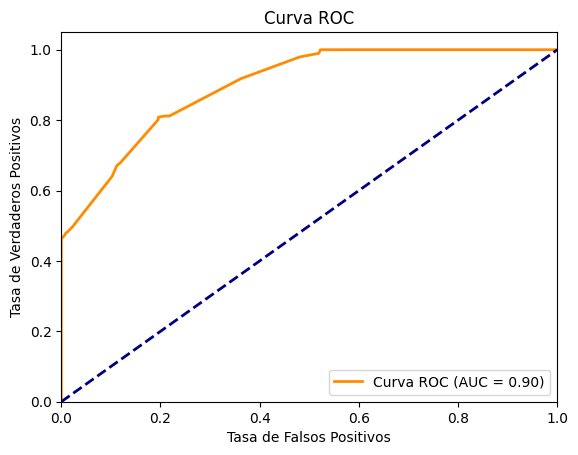

In [ ]:
# Supongamos que ya tienes las predicciones (y_val_pred) y las etiquetas verdaderas (y_val)
# Calcular el AUC
roc_auc = roc_auc_score(y_val, y_val_pred)
print(f'AUC: {roc_auc:.2f}')

# Calcular la curva de ROC
fpr, tpr, _ = roc_curve(y_val, y_val_pred)

# Graficar la curva de ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

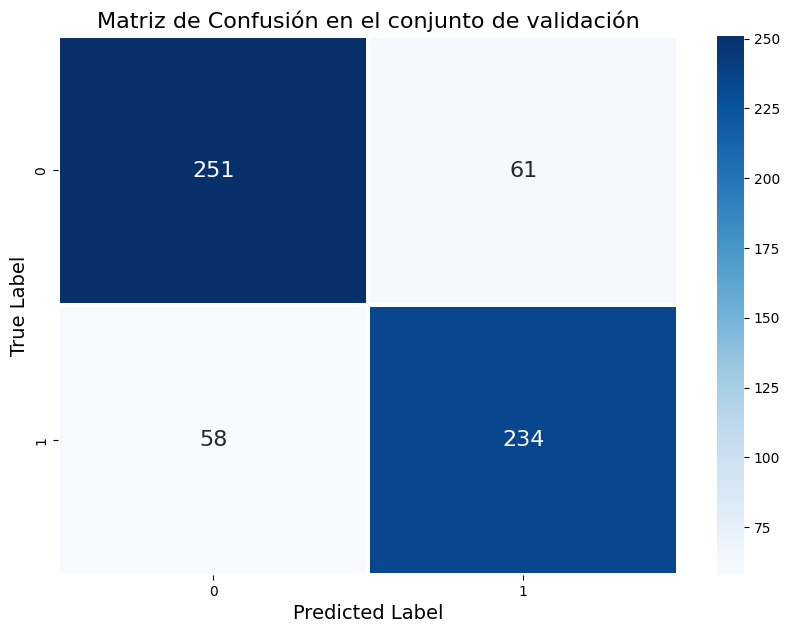

Accuracy: 0.80
Precision: 0.79
Recall (Sensibilidad): 0.80
Specificity: 0.80


In [ ]:
# Definir el umbral para convertir las predicciones continuas en clases binarias
threshold_non_scaled = 0.5  # Ajusta este valor según sea necesario

# Convertir las predicciones continuas en clases binarias
y_val_pred_binary = np.where(y_val_pred > threshold_non_scaled, 1, 0)

# Calcular la matriz de confusión
conf_matrix_val = confusion_matrix(y_val, y_val_pred_binary)

# Crear el gráfico de la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues', cbar=True,
            annot_kws={"size": 16}, linewidths=1.5, linecolor='White')
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Matriz de Confusión en el conjunto de validación', fontsize=16)
plt.show()

# Calcular e imprimir las métricas
true_positives_val = conf_matrix_val[1, 1]
true_negatives_val = conf_matrix_val[0, 0]
false_positives_val = conf_matrix_val[0, 1]
false_negatives_val = conf_matrix_val[1, 0]

accuracy_val = (true_positives_val + true_negatives_val) / (true_positives_val + true_negatives_val + false_positives_val + false_negatives_val)
precision_val = true_positives_val / (true_positives_val + false_positives_val)
recall_val = true_positives_val / (true_positives_val + false_negatives_val)
specificity_val = true_negatives_val / (true_negatives_val + false_positives_val)

print(f"Accuracy: {accuracy_val:.2f}")
print(f"Precision: {precision_val:.2f}")
print(f"Recall (Sensibilidad): {recall_val:.2f}")
print(f"Specificity: {specificity_val:.2f}")


In [ ]:
# Convertir las predicciones continuas en clases binarias
y_val_pred_binary = np.where(y_val_pred > threshold_non_scaled, 1, 0)

# Calcular la matriz de confusión
conf_matrix_val = confusion_matrix(y_val, y_val_pred_binary)

print("Matriz de Confusión en el conjunto de validación:")
print(conf_matrix_val)
print('\n')

# Calcular verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos
true_positives_val = conf_matrix_val[1, 1]
true_negatives_val = conf_matrix_val[0, 0]
false_positives_val = conf_matrix_val[0, 1]
false_negatives_val = conf_matrix_val[1, 0]

# Imprimir los resultados
print("Verdaderos Positivos en el conjunto de validación:", true_positives_val)
print("Verdaderos Negativos en el conjunto de validación:", true_negatives_val)
print("Falsos Positivos en el conjunto de validación:", false_positives_val)
print("Falsos Negativos en el conjunto de validación:", false_negatives_val)
print('\n')

# Calcular el accuracy en porcentaje
accuracy_val = (true_positives_val + true_negatives_val) / (true_positives_val + true_negatives_val + false_positives_val + false_negatives_val)
accuracy_val_percentage = accuracy_val * 100
print("Accuracy:", accuracy_val)
print("Accuracy(%):", f"{accuracy_val_percentage:.2f}")

# Calcular la precisión en porcentaje
precision_val = true_positives_val / (true_positives_val + false_positives_val)
precision_val_percentage = precision_val * 100
print("Precision:", precision_val)
print("Precision(%):", f"{precision_val_percentage:.2f}")

# Calcular el recall (sensibilidad) en porcentaje
recall_val = true_positives_val / (true_positives_val + false_negatives_val)
recall_val_percentage = recall_val * 100
print("Recall (Sensibilidad):", recall_val)
print("Recall (Sensibilidad)(%):", f"{recall_val_percentage:.2f}")

# Calcular la especificidad en porcentaje
specificity_val = true_negatives_val / (true_negatives_val + false_positives_val)
specificity_val_percentage = specificity_val * 100
print("Specificity:", specificity_val)
print("Specificity(%):", f"{specificity_val_percentage:.2f}")

Matriz de Confusión en el conjunto de validación:
[[251  61]
 [ 58 234]]


Verdaderos Positivos en el conjunto de validación: 234
Verdaderos Negativos en el conjunto de validación: 251
Falsos Positivos en el conjunto de validación: 61
Falsos Negativos en el conjunto de validación: 58


Accuracy: 0.8029801324503312
Accuracy(%): 80.30
Precision: 0.7932203389830509
Precision(%): 79.32
Recall (Sensibilidad): 0.8013698630136986
Recall (Sensibilidad)(%): 80.14
Specificity: 0.8044871794871795
Specificity(%): 80.45


Matriz de Confusión en el conjunto de validación:
[[251  61]
 [ 58 234]]


Verdaderos Positivos en el conjunto de validación: 234
Verdaderos Negativos en el conjunto de validación: 251
Falsos Positivos en el conjunto de validación: 61
Falsos Negativos en el conjunto de validación: 58


Accuracy: 0.8029801324503312
Accuracy(%): 80.30
Precision: 0.7932203389830509
Precision(%): 79.32
Recall (Sensibilidad): 0.8013698630136986
Recall (Sensibilidad)(%): 80.14
Specificity: 0.8044871794871795
Specificity(%): 80.45


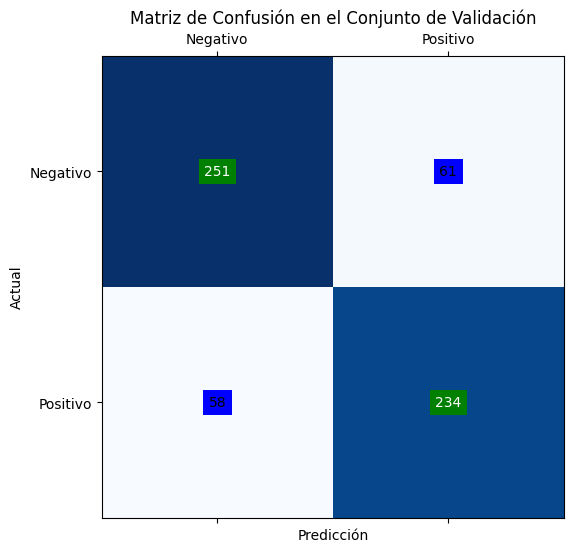

In [ ]:
''' import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Convertir las predicciones continuas en clases binarias
y_val_pred_binary = np.where(y_val_pred > threshold_non_scaled, 1, 0)

# Calcular la matriz de confusión
conf_matrix_val = confusion_matrix(y_val, y_val_pred_binary)

print("Matriz de Confusión en el conjunto de validación:")
print(conf_matrix_val)
print('\n')

# Calcular verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos
true_positives_val = conf_matrix_val[1, 1]
true_negatives_val = conf_matrix_val[0, 0]
false_positives_val = conf_matrix_val[0, 1]
false_negatives_val = conf_matrix_val[1, 0]

# Imprimir los resultados
print("Verdaderos Positivos en el conjunto de validación:", true_positives_val)
print("Verdaderos Negativos en el conjunto de validación:", true_negatives_val)
print("Falsos Positivos en el conjunto de validación:", false_positives_val)
print("Falsos Negativos en el conjunto de validación:", false_negatives_val)
print('\n')

# Calcular el accuracy en porcentaje
accuracy_val = (true_positives_val + true_negatives_val) / (true_positives_val + true_negatives_val + false_positives_val + false_negatives_val)
accuracy_val_percentage = accuracy_val * 100
print("Accuracy:", accuracy_val)
print("Accuracy(%):", f"{accuracy_val_percentage:.2f}")

# Calcular la precisión en porcentaje
precision_val = true_positives_val / (true_positives_val + false_positives_val)
precision_val_percentage = precision_val * 100
print("Precision:", precision_val)
print("Precision(%):", f"{precision_val_percentage:.2f}")

# Calcular el recall (sensibilidad) en porcentaje
recall_val = true_positives_val / (true_positives_val + false_negatives_val)
recall_val_percentage = recall_val * 100
print("Recall (Sensibilidad):", recall_val)
print("Recall (Sensibilidad)(%):", f"{recall_val_percentage:.2f}")

# Calcular la especificidad en porcentaje
specificity_val = true_negatives_val / (true_negatives_val + false_positives_val)
specificity_val_percentage = specificity_val * 100
print("Specificity:", specificity_val)
print("Specificity(%):", f"{specificity_val_percentage:.2f}")

# Crear el gráfico de la matriz de confusión
fig, ax = plt.subplots(figsize=(8, 6))

# Mostrar la matriz de confusión con los colores personalizados
ax.matshow(conf_matrix_val, cmap=plt.cm.Blues)

# Asignar colores personalizados a las celdas
for i in range(2):
    for j in range(2):
        color = 'green' if (i == j) else 'blue'
        ax.text(j, i, format(conf_matrix_val[i, j], 'd'),
                ha="center", va="center",
                color="white" if conf_matrix_val[i, j] > conf_matrix_val.max() / 2 else "black",
                bbox=dict(facecolor=color, edgecolor='none'))

ax.set_xticks(np.arange(2))
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Negativo', 'Positivo'])
ax.set_yticklabels(['Negativo', 'Positivo'])
ax.set_xlabel('Predicción')
ax.set_ylabel('Actual')
ax.set_title('Matriz de Confusión en el Conjunto de Validación')

plt.show()
 '''

# 6. ESCALADO


## Descarga de Tickers. Filtrado (2). Rentabilidad. Descarga de datos

In [ ]:
def get_sp500_listing_dates():
    url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    table = soup.find("table", {"class": "wikitable sortable"})
    rows = table.find_all("tr")[1:]  # Exclusión de encabezados

    sp500_listing_dates = {}

    for row in rows:
        data = row.find_all("td")
        symbol = data[0].text.strip()
        listing_date = data[5].text.strip()
        sp500_listing_dates[symbol] = listing_date
    return sp500_listing_dates

sp500_listing_dates = get_sp500_listing_dates()

df_list_of_tickers = pd.DataFrame(sp500_listing_dates.items(), columns=['Empresa', 'Listado_SP500'])
df_list_of_tickers.head()

,Empresa,Listado_SP500
0,MMM,1957-03-04
1,AOS,2017-07-26
2,ABT,1957-03-04
3,ABBV,2012-12-31
4,ACN,2011-07-06


In [ ]:
df_sorted = df_list_of_tickers.sort_values(by='Listado_SP500', ascending=True)
df_sorted['Listado_SP500'] = pd.to_datetime(df_sorted['Listado_SP500'])
df_sorted['Year'] = df_sorted['Listado_SP500'].dt.year
df_sorted.head()

,Empresa,Listado_SP500,Year
0,MMM,1957-03-04,1957
377,PPG,1957-03-04,1957
460,UNP,1957-03-04,1957
380,PG,1957-03-04,1957
202,F,1957-03-04,1957


In [ ]:
# Filtrar el DataFrame para incluir solo los listados antes a 2001
df_filtered = df_sorted[df_sorted['Year'] < 2000]
df_filtered.tail()

,Empresa,Listado_SP500,Year
477,VMC,1999-06-30,1999
390,QCOM,1999-07-22,1999
374,PNW,1999-10-04,1999
35,ADI,1999-10-12,1999
456,USB,1999-11-01,1999


In [ ]:
df_filtered.shape

(181, 3)

In [ ]:
contains_dot = df_sorted["Empresa"].str.contains(".", regex=False)
rows_with_dot = df_sorted[contains_dot]

if len(rows_with_dot) > 0:
    print("Sí, hay filas que contienen un '.' en la columna 'Empresa':")
    print(rows_with_dot)
else:
    print("No hay filas que contengan un '.' en la columna 'Empresa'.")

'''
En las empresas del S&P 500, las siglas con un ".B" (o ".A") indican diferentes clases de acciones para la misma empresa. Las compañías pueden emitir más de una clase de acciones con diferentes derechos de voto, dividendos u otros atributos.
'''

Sí, hay filas que contienen un '.' en la columna 'Empresa':
   Empresa Listado_SP500  Year
78    BF.B    1982-10-31  1982
62   BRK.B    2010-02-16  2010


'\nEn las empresas del S&P 500, las siglas con un ".B" (o ".A") indican diferentes clases de acciones para la misma empresa. Las compañías pueden emitir más de una clase de acciones con diferentes derechos de voto, dividendos u otros atributos.\n'

In [ ]:
# Definir la expresión regular para buscar dos o más caracteres en la misma secuencia
pattern = r'(\w)\1{1,}'

# Aplicar la expresión regular a la columna "Empresa"
contains_sequence = df_filtered["Empresa"].str.contains(pattern, regex=True)

# Filtrar las filas que contienen la secuencia
rows_with_sequence = df_filtered[contains_sequence]

if len(rows_with_sequence) > 0:
    print("Sí, hay filas que contienen dos o más caracteres en la misma secuencia en la columna 'Empresa':")
    print(rows_with_sequence)
else:
    print("No hay filas que contengan dos o más caracteres en la misma secuencia en la columna 'Empresa'.")

Sí, hay filas que contienen dos o más caracteres en la misma secuencia en la columna 'Empresa':
    Empresa Listado_SP500  Year
0       MMM    1957-03-04  1957
377     PPG    1957-03-04  1957
169     LLY    1970-12-31  1970
255     IFF    1976-03-31  1976
339     NEE    1976-06-30  1976
479     GWW    1981-06-30  1981
39     AAPL    1982-11-30  1982
59     BBWI    1983-09-30  1983
56     BALL    1984-10-31  1984
432     SYY    1986-12-31  1986
303     MMC    1987-08-31  1987
24      AEE    1991-09-19  1991
18      ALL    1995-07-13  1995
88      CCL    1998-12-22  1998
63      BBY    1999-06-29  1999


In [ ]:
tickers = df_filtered['Empresa'].tolist()

# Descargar datos del S&P 500
sp500_data = yf.download(tickers, start=start_date, end=end_date)

# Asegurarse de que el DataFrame no esté vacío
if not sp500_data.empty:
    # Crear un diccionario para almacenar los resultados
    results = {
        'Ticker': [],
        'Rentabilidad Anualizada': [],
        'Rentabilidad Total': []
    }

    # Calcular el retorno diario, acumulado y anualizado para cada ticker
    for ticker in tickers:
        # Calcular el retorno diario
        sp500_data['Daily_Return'] = sp500_data['Adj Close'][ticker].pct_change()

        # Calcular el retorno acumulado
        sp500_data['Cumulative_Return'] = (1 + sp500_data['Daily_Return']).cumprod()

        # Calcular el retorno anualizado
        total_days = sp500_data.shape[0]
        total_years = total_days / 252  # 252 días hábiles en un año
        annualized_return = (sp500_data['Cumulative_Return'].iloc[-1])**(1/total_years) - 1

        # Agregar los resultados al diccionario
        results['Ticker'].append(ticker)
        results['Rentabilidad Anualizada'].append(annualized_return)
        results['Rentabilidad Total'].append(sp500_data['Cumulative_Return'].iloc[-1])

    # Convertir el diccionario en un DataFrame
    result_df = pd.DataFrame(results)

    # Mostrar el DataFrame resultado
    result_df
else:
    print("El DataFrame de datos del S&P 500 está vacío.")

result_df.head()

[**********************59%%**                    ]  106 of 181 completed

$BF.B: possibly delisted; No price data found  (1d 2000-01-04 00:00:00 -> 2023-12-31 00:00:00)


[**********************99%%**********************]  180 of 181 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF.B']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2000-01-04 00:00:00 -> 2023-12-31 00:00:00)')


,Ticker,Rentabilidad Anualizada,Rentabilidad Total
0,MMM,0.072238,5.315560
1,PPG,0.097398,9.264360
2,UNP,0.161821,36.327462
3,PG,0.071732,5.255771
4,F,-0.001901,0.955455


In [ ]:
# Descargar datos del S&P 500 desde el 1 de enero de 2000 hasta el 31 de diciembre de 2023
sp500_data = yf.download('^GSPC', start=start_date, end=end_date)

# Calcular el retorno diario
sp500_data['Daily_Return'] = sp500_data['Adj Close'].pct_change()

# Calcular el retorno acumulado
sp500_data['Cumulative_Return'] = (1 + sp500_data['Daily_Return']).cumprod()

# Calcular el retorno anualizado
total_years = len(sp500_data) / 252  # 252 días hábiles en un año
annualized_return = (sp500_data['Cumulative_Return'].iloc[-1])**(1/total_years) - 1

# Crear un DataFrame con la rentabilidad anualizada y la rentabilidad total
result_df_SP500 = pd.DataFrame({
    'Ticker': 'SP_500',
    'Rentabilidad Anualizada': [annualized_return],
    'Rentabilidad Total': [sp500_data['Cumulative_Return'].iloc[-1]]
})

result_df_SP500.head()

[*********************100%%**********************]  1 of 1 completed


,Ticker,Rentabilidad Anualizada,Rentabilidad Total
0,SP_500,0.052529,3.408433


In [ ]:
concatenated_df = pd.concat([result_df, result_df_SP500], ignore_index=True)
concatenated_df_sorted = concatenated_df.sort_values(by='Rentabilidad Total', ascending=False)
concatenated_df_sorted = concatenated_df_sorted.drop(concatenated_df_sorted[concatenated_df_sorted['Ticker'] == 'BF.B'].index)
concatenated_df_sorted.head()

,Ticker,Rentabilidad Anualizada,Rentabilidad Total
92,AAPL,0.258868,248.176459
134,UNH,0.211153,98.359037
147,AZO,0.203764,84.948176
54,SHW,0.194263,70.263578
106,TJX,0.178971,51.602419


In [ ]:
# Número determinado
valor_limite = result_df_SP500["Rentabilidad Anualizada"].values[0]

# Crear una máscara booleana para las filas que cumplen la condición
mask = concatenated_df_sorted['Rentabilidad Anualizada'] > valor_limite

# Filtrar el DataFrame
concatenated_df_sorted_filtrado = concatenated_df_sorted[mask]
concatenated_df_sorted_filtrado.head()

,Ticker,Rentabilidad Anualizada,Rentabilidad Total
92,AAPL,0.258868,248.176459
134,UNH,0.211153,98.359037
147,AZO,0.203764,84.948176
54,SHW,0.194263,70.263578
106,TJX,0.178971,51.602419


In [ ]:
df_maestro = concatenated_df_sorted_filtrado
df_maestro.head()

,Ticker,Rentabilidad Anualizada,Rentabilidad Total
92,AAPL,0.258868,248.176459
134,UNH,0.211153,98.359037
147,AZO,0.203764,84.948176
54,SHW,0.194263,70.263578
106,TJX,0.178971,51.602419


In [ ]:
# Definir el nombre que quieres buscar
nombre_a_buscar = 'AZO'

# Filtrar el DataFrame para encontrar el nombre específico
resultado = df_maestro[df_maestro['Ticker'] == nombre_a_buscar]
resultado

,Ticker,Rentabilidad Anualizada,Rentabilidad Total
147,AZO,0.203764,84.948176


In [ ]:
# Supongamos que df_maestro ya está definido y tiene una columna llamada 'TICKER'
tickers = df_maestro['Ticker'].tolist()

# Diccionario para almacenar los dataframes de cada ticker
cotizaciones_dict = {}

for ticker in tickers:
    cotizaciones_dict[ticker] = yf.download(ticker, start=start_date, end=end_date)

# Puedes unir todos los dataframes en uno solo si lo deseas
cotizaciones_df = pd.concat(cotizaciones_dict, axis=1)
cotizaciones_df.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

AAPL                                                     \
                Open      High       Low     Close Adj Close     Volume   
Date                                                                      
2000-01-04  0.966518  0.987723  0.903460  0.915179  0.773741  512377600   
2000-01-05  0.926339  0.987165  0.919643  0.928571  0.785063  778321600   
2000-01-06  0.947545  0.955357  0.848214  0.848214  0.717125  767972800   
2000-01-07  0.861607  0.901786  0.852679  0.888393  0.751094  460734400   
2000-01-10  0.910714  0.912946  0.845982  0.872768  0.737884  505064000   

                 UNH                                ...      MDT           \
                Open      High       Low     Close  ...      Low    Close   
Date                                                ...                     
2000-01-04  6.671875  6.781250  6.617188  6.632813  ...  34.2500  34.5000   
2000-01-05  6.640625  6.773438  6.578125  6.617188  ...  34.6250  36.6250   
2000-01-06  6.625000  6.937500  6.609375  6.859375  ...  36.3125  38.0000   
2000-01-07  7.187500  7.687500  7.109375  7.664063  ...  39.3125  42.2500   
2000-01-10  7.726563  7.734375  7.476563  7.531250  ...  41.4375  41.9375   

                                     TFC                             \
            Adj Close    Volume     Open     High      Low    Close   
Date                                                                  
2000-01-04  22.609913   5109300  25.8125  25.8750  24.7500  25.0625   
2000-01-05  24.030422   5841200  25.1250  25.6875  24.9375  25.3750   
2000-01-06  24.932589   6130500  25.4375  26.6875  25.3125  26.5625   
2000-01-07  27.721090  11537600  27.2500  27.2500  26.4375  26.7500   
2000-01-10  27.516054   6966700  26.8750  27.0000  25.6875  26.0625   

                               
            Adj Close  Volume  
Date                           
2000-01-04  10.283753  766700  
2000-01-05  10.411983  620200  
2000-01-06  10.899237  691500  
2000-01-07  10.976175  579500  
2000-01-10  10.694079  477600  

[5 rows x 828 columns]

## Normalización de valores

In [ ]:
# Asegurar que las columnas tengan un MultiIndex
if not isinstance(cotizaciones_df.columns, pd.MultiIndex):
    cotizaciones_df.columns = pd.MultiIndex.from_tuples(cotizaciones_df.columns, names=['Ticker', 'Attribute'])

# Extraer el primer nivel de las columnas que corresponde a los tickers
tickers = cotizaciones_df.columns.get_level_values(0).unique().tolist()

# Crear la columna Rentabilidad para todas las empresas
for ticker in tickers:
    open_prices = cotizaciones_df[(ticker, 'Open')]
    close_prices = cotizaciones_df[(ticker, 'Close')]
    rentabilidad = ((close_prices - open_prices) / open_prices) * 100
    cotizaciones_df[(ticker, 'Rentabilidad')] = rentabilidad

# Normalizar las columnas Volume y Rentabilidad
scaler = MinMaxScaler(feature_range=(-1, 1))

for ticker in tickers:
    # Normalizar la columna Volume
    volume = cotizaciones_df[(ticker, 'Volume')].values.reshape(-1, 1)
    cotizaciones_df[(ticker, 'Volume_normalized')] = scaler.fit_transform(volume)

    # Normalizar la columna Rentabilidad
    rentabilidad = cotizaciones_df[(ticker, 'Rentabilidad')].values.reshape(-1, 1)
    cotizaciones_df[(ticker, 'Rentabilidad_normalized')] = scaler.fit_transform(rentabilidad)

# Ordenar las columnas para que Rentabilidad y las columnas normalizadas estén al final de cada subcolumna
new_columns = []
for ticker in tickers:
    sub_columns = cotizaciones_df[ticker].columns.tolist()
    sub_columns = [col for col in sub_columns if col not in ['Rentabilidad', 'Volume_normalized', 'Rentabilidad_normalized']]
    sub_columns.extend(['Rentabilidad', 'Volume_normalized', 'Rentabilidad_normalized'])
    new_columns.extend([(ticker, sub_col) for sub_col in sub_columns])

cotizaciones_df = cotizaciones_df[new_columns]
cotizaciones_df.head()

AAPL                                                     \
                Open      High       Low     Close Adj Close     Volume   
Date                                                                      
2000-01-04  0.966518  0.987723  0.903460  0.915179  0.773741  512377600   
2000-01-05  0.926339  0.987165  0.919643  0.928571  0.785063  778321600   
2000-01-06  0.947545  0.955357  0.848214  0.848214  0.717125  767972800   
2000-01-07  0.861607  0.901786  0.852679  0.888393  0.751094  460734400   
2000-01-10  0.910714  0.912946  0.845982  0.872768  0.737884  505064000   

                                                                        UNH  \
           Rentabilidad Volume_normalized Rentabilidad_normalized      Open   
Date                                                                          
2000-01-04    -5.311745         -0.867976               -0.467388  6.671875   
2000-01-05     0.240950         -0.796076               -0.025515  6.640625   
2000-01-06   -10.482987         -0.798874               -0.878907  6.625000   
2000-01-07     3.108838         -0.881938                0.202707  7.187500   
2000-01-10    -4.166619         -0.869953               -0.376261  7.726563   

            ...                     MDT      TFC                             \
            ... Rentabilidad_normalized     Open     High      Low    Close   
Date        ...                                                               
2000-01-04  ...                0.122378  25.8125  25.8750  24.7500  25.0625   
2000-01-05  ...                0.637488  25.1250  25.6875  24.9375  25.3750   
2000-01-06  ...                0.548053  25.4375  26.6875  25.3125  26.5625   
2000-01-07  ...                0.844524  27.2500  27.2500  26.4375  26.7500   
2000-01-10  ...                0.148068  26.8750  27.0000  25.6875  26.0625   

                                                              \
            Adj Close  Volume Rentabilidad Volume_normalized   
Date                                                           
2000-01-04  10.283753  766700    -2.905569         -0.985793   
2000-01-05  10.411983  620200     0.995025         -0.989227   
2000-01-06  10.899237  691500     4.422604         -0.987556   
2000-01-07  10.976175  579500    -1.834862         -0.990181   
2000-01-10  10.694079  477600    -3.023256         -0.992569   

                                    
           Rentabilidad_normalized  
Date                                
2000-01-04               -0.086243  
2000-01-05                0.105242  
2000-01-06                0.273507  
2000-01-07               -0.033680  
2000-01-10               -0.092020  

[5 rows x 1242 columns]

## Regresión Lineal w/ GS

In [ ]:
"""
# Supongamos que df_maestro ya está definido y tiene una columna llamada 'Ticker'
tickers = df_maestro['Ticker'].tolist()

# Asegurarse de que las columnas 'Date' estén de tipo datetime
for ticker in tickers:
    if 'Date' in cotizaciones_df[ticker].columns:
        cotizaciones_df[(ticker, 'Date')] = pd.to_datetime(cotizaciones_df[(ticker, 'Date')])

# Definir los parámetros para GridSearchCV
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False],
    'n_jobs': [None, -1]
}

# Resultados para los modelos estándar y optimizados
results = []

# Iterar sobre cada ticker en el primer nivel del MultiIndex con una barra de progreso
for ticker in tqdm(tickers, desc="Procesando tickers", unit="ticker"): ## Esto está hecho solo para los dos primeros. Si se quiere hacer de todos simplemente quitar el [;2]
    # Filtrar las columnas para el ticker actual
    df_ticker = cotizaciones_df[ticker]

    # Asegurarse de que los datos estén ordenados por fecha
    df_ticker = df_ticker.sort_values(by='Date')

    # Aqui es donde se elimina la primera fila del df.
    df_ticker = df_ticker.iloc[1:]
    df_ticker = df_ticker.dropna()
    # Aqui es donde se susttuye el valor de la primera fila del y_train con el de la siguiente fila.


    # y_train = y_train_sorted.fillna(method='bfill')

# Esta linea de arriba esta comentada, si no funciona el modelo, se quite el comentario y se reejecute y se deje así


    # Modelo de regresión lineal estándar
    model_standard = LinearRegression()
    model_standard.fit(X_train, y_train)
    y_pred_standard = model_standard.predict(X_test)
    mse_standard = mean_squared_error(y_test, y_pred_standard)

    # GridSearchCV
    grid_search = GridSearchCV(estimator=LinearRegression(), param_grid=param_grid,
                               scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred_grid = best_model.predict(X_test)
    mse_grid = mean_squared_error(y_test, y_pred_grid)

    # Comparar MSE estándar y MSE con Grid Search
    if mse_grid < mse_standard:
        comparison = 'Mejor'
    elif mse_grid > mse_standard:
        comparison = 'Peor'
    else:
        comparison = 'Igual'


    # Almacenar resultados
    results.append({
        'Ticker': ticker,
        'MSE_Standard': mse_standard,
        'MSE_Grid': mse_grid,
        'Best Params': best_model,
        'Comparacion': comparison,
        #'Graficado': y_pred_grid # Esta es para que cuando se ejecute (aunque en este análisis no se han guardado) para poder graficar los histogramas (unicamente por eso)
    })



# Crear DataFrame con los resultados
df_linearregresion = pd.DataFrame(results)
df_linearregresion

# No tarda tanto como parece, pone 2h 23' pero igual solo es 2h

"""

'\n# Supongamos que df_maestro ya está definido y tiene una columna llamada \'Ticker\'\ntickers = df_maestro[\'Ticker\'].tolist()\n\n# Asegurarse de que las columnas \'Date\' estén de tipo datetime\nfor ticker in tickers:\n    if \'Date\' in cotizaciones_df[ticker].columns:\n        cotizaciones_df[(ticker, \'Date\')] = pd.to_datetime(cotizaciones_df[(ticker, \'Date\')])\n\n# Definir los parámetros para GridSearchCV\nparam_grid = {\n    \'fit_intercept\': [True, False],\n    \'copy_X\': [True, False],\n    \'positive\': [True, False],\n    \'n_jobs\': [None, -1]\n}\n\n# Resultados para los modelos estándar y optimizados\nresults = []\n\n# Iterar sobre cada ticker en el primer nivel del MultiIndex con una barra de progreso\nfor ticker in tqdm(tickers, desc="Procesando tickers", unit="ticker"): ## Esto está hecho solo para los dos primeros. Si se quiere hacer de todos simplemente quitar el [;2]\n    # Filtrar las columnas para el ticker actual\n    df_ticker = cotizaciones_df[ticker]\n\n

In [ ]:
'''
    results.append({
        'Ticker': ticker,
        'MSE_Standard': mse_standard,
        'MSE_Grid': mse_grid,
        'Best Params': best_model,
        'Comparacion': comparison,
        #'Graficado': y_pred_grid # Esta es para que cuando se ejecute (aunque en este análisis no se han guardado) para poder graficar los histogramas (unicamente por eso)
    })

# Crear DataFrame con los resultados
df_linearregresion = pd.DataFrame(results)
df_linearregresion.tail(10)
'''

"\n    results.append({\n        'Ticker': ticker,\n        'MSE_Standard': mse_standard,\n        'MSE_Grid': mse_grid,\n        'Best Params': best_model,\n        'Comparacion': comparison,\n        #'Graficado': y_pred_grid # Esta es para que cuando se ejecute (aunque en este análisis no se han guardado) para poder graficar los histogramas (unicamente por eso)\n    })\n\n# Crear DataFrame con los resultados\ndf_linearregresion = pd.DataFrame(results)\ndf_linearregresion.tail(10)\n"

In [ ]:
'''
# Contar los valores de la columna 'Comparison'
comparison_counts = df_linearregresion['Comparacion'].value_counts()

# Imprimir el conteo de comparaciones
print("Conteo de comparaciones:")
comparison_counts
'''

'\n# Contar los valores de la columna \'Comparison\'\ncomparison_counts = df_linearregresion[\'Comparacion\'].value_counts()\n\n# Imprimir el conteo de comparaciones\nprint("Conteo de comparaciones:")\ncomparison_counts\n'

In [ ]:
'''
# Suponiendo que el nombre del archivo sea "df_linearregresion.csv"
df_linearregresion.to_excel("df_linearregresion.xlsx", index=False)
'''

'\n# Suponiendo que el nombre del archivo sea "df_linearregresion.csv"\ndf_linearregresion.to_excel("df_linearregresion.xlsx", index=False)\n'

## Random Forest w/ GS

In [ ]:
'''

# Definir los parámetros para GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Resultados para los modelos estándar y optimizados
results = []

# Iterar sobre cada ticker en el primer nivel del MultiIndex con una barra de progreso
for ticker in tqdm(tickers, desc="Procesando tickers", unit="ticker"):
    # Filtrar las columnas para el ticker actual
    df_ticker = cotizaciones_df[ticker]

    # Asegurarse de que los datos estén ordenados por fecha
    df_ticker = df_ticker.sort_values(by='Date')

    # Aqui es donde se elimina la primera fila del df.
    df_ticker = df_ticker.iloc[1:]

    df_ticker = df_ticker.dropna()

    # Modelo de Random Forest estándar
    model_standard = RandomForestRegressor(random_state=random_seed)
    model_standard.fit(X_train, y_train)
    y_pred_standard = model_standard.predict(X_test)
    mse_standard = mean_squared_error(y_test, y_pred_standard)

    # GridSearchCV
    grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=random_seed), param_grid=param_grid,
                               scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred_grid = best_model.predict(X_test)
    mse_grid = mean_squared_error(y_test, y_pred_grid)

    # Comparar MSE estándar y MSE con Grid Search
    if mse_grid < mse_standard:
        comparison = 'Mejor'
    elif mse_grid > mse_standard:
        comparison = 'Peor'
    else:
        comparison = 'Igual'

    # Almacenar resultados
    results.append({
        'Ticker': ticker,
        'MSE_Standard': mse_standard,
        'MSE_Grid': mse_grid,
        'Best Params': grid_search.best_params_,
        'Comparacion': comparison
    })

# Crear DataFrame con los resultados
df_randomforest = pd.DataFrame(results)
df_randomforest
'''

'\n\n# Definir los parámetros para GridSearchCV\nparam_grid = {\n    \'n_estimators\': [100, 200, 300],\n    \'max_depth\': [None, 10, 20, 30],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 2, 4],\n    \'bootstrap\': [True, False]\n}\n\n# Resultados para los modelos estándar y optimizados\nresults = []\n\n# Iterar sobre cada ticker en el primer nivel del MultiIndex con una barra de progreso\nfor ticker in tqdm(tickers, desc="Procesando tickers", unit="ticker"):\n    # Filtrar las columnas para el ticker actual\n    df_ticker = cotizaciones_df[ticker]\n\n    # Asegurarse de que los datos estén ordenados por fecha\n    df_ticker = df_ticker.sort_values(by=\'Date\')\n\n    # Aqui es donde se elimina la primera fila del df.\n    df_ticker = df_ticker.iloc[1:]\n\n    df_ticker = df_ticker.dropna()\n\n    # Modelo de Random Forest estándar\n    model_standard = RandomForestRegressor(random_state=random_seed)\n    model_standard.fit(X_train, y_train)\n    y_pred_stand

In [ ]:
'''
# Contar los valores de la columna 'Comparacion'
comparison_counts = df_randomforest['Comparacion'].value_counts()

# Imprimir el conteo de comparaciones
print("Conteo de comparaciones:")
comparison_counts
'''

'\n# Contar los valores de la columna \'Comparacion\'\ncomparison_counts = df_randomforest[\'Comparacion\'].value_counts()\n\n# Imprimir el conteo de comparaciones\nprint("Conteo de comparaciones:")\ncomparison_counts\n'

## Light GMB w/ GS

In [ ]:
"""
# Supongamos que df_maestro ya está definido y tiene una columna llamada 'Ticker'
tickers = df_maestro['Ticker'].tolist()
'''
'''
# Asegurarse de que las columnas 'Date' estén de tipo datetime
for ticker in tickers:
    if 'Date' in cotizaciones_df[ticker].columns:
        cotizaciones_df[(ticker, 'Date')] = pd.to_datetime(cotizaciones_df[(ticker, 'Date')])
'''
 '''
# Definir los parámetros para GridSearchCV
param_grid = {
    'num_leaves': [31, 50, 100],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 9],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Resultados para los modelos estándar y optimizados
results = []

# Iterar sobre cada ticker en el primer nivel del MultiIndex con una barra de progreso
for ticker in tqdm(tickers, desc="Procesando tickers", unit="ticker"):
    # Filtrar las columnas para el ticker actual
    df_ticker = cotizaciones_df[ticker]

    # Asegurarse de que los datos estén ordenados por fecha
    df_ticker = df_ticker.sort_values(by='Date')

    # Aqui es donde se elimina la primera fila del df.
    df_ticker = df_ticker.iloc[1:]

    df_ticker = df_ticker.dropna()

    # Rellenar NaNs en y_train con el valor del siguiente dato
    y_train = y_train.fillna(method='bfill')

    # Modelo de LightGBM estándar
    model_standard = LGBMRegressor()
    model_standard.fit(X_train, y_train)
    y_pred_standard = model_standard.predict(X_test)
    mse_standard = mean_squared_error(y_test, y_pred_standard)

    # GridSearchCV
    grid_search = GridSearchCV(estimator=LGBMRegressor(), param_grid=param_grid,
                               scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred_grid = best_model.predict(X_test)
    mse_grid = mean_squared_error(y_test, y_pred_grid)

    # Comparar MSE estándar y MSE con Grid Search
    if mse_grid < mse_standard:
        comparison = 'Mejor'
    elif mse_grid > mse_standard:
        comparison = 'Peor'
    else:
        comparison = 'Igual'

    # Almacenar resultados
    results.append({
        'Ticker': ticker,
        'MSE_Standard': mse_standard,
        'MSE_Grid': mse_grid,
        'Best Params': grid_search.best_params_,
        'Comparacion': comparison
    })

# Crear DataFrame con los resultados
df_lgbm_results = pd.DataFrame(results)
df_lgbm_results


"""

'\n# Supongamos que df_maestro ya está definido y tiene una columna llamada \'Ticker\'\ntickers = df_maestro[\'Ticker\'].tolist()\n\'\'\'\n\'\'\'\n# Asegurarse de que las columnas \'Date\' estén de tipo datetime\nfor ticker in tickers:\n    if \'Date\' in cotizaciones_df[ticker].columns:\n        cotizaciones_df[(ticker, \'Date\')] = pd.to_datetime(cotizaciones_df[(ticker, \'Date\')])\n\'\'\'\n \'\'\'\n# Definir los parámetros para GridSearchCV\nparam_grid = {\n    \'num_leaves\': [31, 50, 100],\n    \'learning_rate\': [0.01, 0.1, 0.2],\n    \'n_estimators\': [100, 200],\n    \'max_depth\': [3, 6, 9],\n    \'subsample\': [0.7, 0.8, 0.9],\n    \'colsample_bytree\': [0.7, 0.8, 0.9]\n}\n\n# Resultados para los modelos estándar y optimizados\nresults = []\n\n# Iterar sobre cada ticker en el primer nivel del MultiIndex con una barra de progreso\nfor ticker in tqdm(tickers, desc="Procesando tickers", unit="ticker"):\n    # Filtrar las columnas para el ticker actual\n    df_ticker = cotizacio

In [ ]:
'''
# Contar los valores de la columna 'Comparacion'
comparison_counts = df_lgbm_results['Comparacion'].value_counts()

# Imprimir el conteo de comparaciones
print("Conteo de comparaciones:")
comparison_counts
'''

'\n# Contar los valores de la columna \'Comparacion\'\ncomparison_counts = df_lgbm_results[\'Comparacion\'].value_counts()\n\n# Imprimir el conteo de comparaciones\nprint("Conteo de comparaciones:")\ncomparison_counts\n'

## XGBOOST w/ GS

In [ ]:
tickers = df_maestro['Ticker'].tolist()

# Resultados para los modelos estándar y optimizados
results = []

# Iterar sobre cada ticker en el primer nivel del MultiIndex. TQDM mide el progreso del cálculo realizado.
for ticker in tqdm(tickers, desc="Procesando tickers", unit="ticker"):

    # Filtrar las columnas para el ticker actual
    df_ticker = cotizaciones_df[ticker]

    # Asegurarse de que los datos estén ordenados por fecha
    df_ticker = df_ticker.sort_values(by='Date')

    # Filtrados y eliminaciones para poder ejecutar correctamente el bucle.
    df_ticker = df_ticker.iloc[1:]
    df_ticker = df_ticker.dropna()

    # Dividir los datos en conjuntos de entrenamiento y prueba de forma iterativa para cada Ticker
    columns_to_drop = ["Rentabilidad", "Rentabilidad_normalized", "Adj Close", "Volume"]
    X = df_ticker.drop(columns=columns_to_drop)
    y = df_ticker["Rentabilidad_normalized"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_seed)

    # Modelo de XGBoost estándar
    model_standard = XGBRegressor()
    model_standard.fit(X_train, y_train)
    y_pred_standard = model_standard.predict(X_test)
    mse_standard = mean_squared_error(y_test, y_pred_standard)

    # GridSearchCV
    grid_search = GridSearchCV(estimator=XGBRegressor(), param_grid=param_grid_xgb,
                               scoring='neg_mean_squared_error', cv=cross_validation, n_jobs=n_jobs, verbose=verbose)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred_grid = best_model.predict(X_test)
    mse_grid = mean_squared_error(y_test, y_pred_grid)

    # Comparar MSE estándar y MSE con Grid Search
    if mse_grid < mse_standard:
        comparison = 'Mejor'
    elif mse_grid > mse_standard:
        comparison = 'Peor'
    else:
        comparison = 'Igual'

    # Hacer la predicción para el siguiente día
    next_day_prediction = best_model.predict(X_test)

    # Almacenar resultados
    results.append({
        'Ticker': ticker,
        'MSE_Standard': mse_standard,
        'MSE_Grid': mse_grid,
        'Best Params': grid_search.best_params_,
        'Comparacion': comparison,
        'Next Day Prediction': next_day_prediction[0]
    })

# Crear DataFrame con los resultados
df_xgb_results = pd.DataFrame(results)
df_xgb_results

Procesando tickers:   0%|          | 0/138 [00:00<?, ?ticker/s]

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


Procesando tickers:   1%|          | 1/138 [15:52<36:14:22, 952.28s/ticker]

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


Procesando tickers:   1%|          | 1/138 [28:16<64:33:38, 1696.49s/ticker]


KeyboardInterrupt: 

In [ ]:
comparison_counts = df_xgb_results['Comparacion'].value_counts()

# Imprimir el conteo de comparaciones
print("Conteo de comparaciones:")
comparison_counts

In [ ]:
# Suponiendo que el nombre del archivo sea "df_linearregresion.csv"
# df_xgb_results.to_excel("df_xgb_results.xlsx", index=False)
ruta_archivo = r'C:\Users\migue\Downloads\resultados_xgb.xlsx'
df_xgb_results.to_excel(ruta_archivo, index=False)

In [ ]:
""" # Desnormalizar las rentabilidades normalizadas que se han hecho
# Supongamos que y_pred_standard y y_test son las predicciones y las etiquetas verdaderas, respectivamente

# Desnormalizar las predicciones
y_pred_standard_desnorm = scalers[ticker].inverse_transform(y_pred_standard.reshape(-1, 1))

# Desnormalizar las etiquetas verdaderas
y_test_desnorm = scalers[ticker].inverse_transform(y_test.values.reshape(-1, 1)) """

## Binarizado (si adaptamos el codigo sin binarizar, para poder usarlo en el binarizado, debería realizar la prediccion de t+1)

In [ ]:
tickers = df_maestro['Ticker'].tolist()

# Resultados para los modelos estándar y optimizados
results = []

# Iterar sobre cada ticker en el primer nivel del MultiIndex con una barra de progreso
for ticker in tqdm(tickers, desc="Procesando tickers", unit="ticker"):
    # Filtrar las columnas para el ticker actual
    df_ticker = cotizaciones_df[ticker]

    # Asegurarse de que los datos estén ordenados por fecha
    df_ticker = df_ticker.sort_values(by='Date')

    # Filtrados y eliminaciones para poder ejecutar correctamente el bucle.
    df_ticker = df_ticker.iloc[1:]
    df_ticker = df_ticker.dropna()

    # Definir las columnas a binarizar (todas)
    columnas_binarizar = ['Open', 'High', 'Low', 'Close', 'Rentabilidad', 'Volume_normalized', 'Rentabilidad_normalized', 'Adj Close', 'Volume']
    for columna in columnas_binarizar:
        df_ticker[columna] = (df_ticker[columna].shift(1) < df_ticker[columna]).astype(int)

    # Dividir los datos en conjuntos de entrenamiento y prueba para cada ticker.
    columns_to_drop = ["Rentabilidad", "Rentabilidad_normalized", "Adj Close", "Volume"]
    X = df_ticker.drop(columns=columns_to_drop)
    y = df_ticker["Rentabilidad_normalized"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_seed)

    # Modelo de XGBoost estándar
    model_standard = XGBRegressor()
    model_standard.fit(X_train, y_train)
    y_pred_standard = model_standard.predict(X_test)
    mse_standard = mean_squared_error(y_test, y_pred_standard)

    # GridSearchCV
    grid_search = GridSearchCV(estimator=XGBRegressor(), param_grid=param_grid_xgb,
                               scoring='neg_mean_squared_error', cv=cross_validation, n_jobs=n_jobs, verbose=verbose)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred_grid = best_model.predict(X_test)
    mse_grid = mean_squared_error(y_test, y_pred_grid)

    # ROC y AUC para el modelo optimizado
    fpr, tpr, _ = roc_curve(y_test, y_pred_grid)
    roc_auc = auc(fpr, tpr)

    # Hacer la predicción para el siguiente día utilizando todo el conjunto de datos de prueba
    next_day_predictions = best_model.predict(X_test)

    # Almacenar resultados
    results.append({
        'Ticker': ticker,
        'MSE_Standard': mse_standard,
        'MSE_Grid': mse_grid,
        'Best Params': grid_search.best_params_,
        'ROC_AUC': roc_auc,
        'Next Day Predictions': next_day_predictions[0]
    })

# Crear DataFrame con los resultados
df_xgb_results_binarizado = pd.DataFrame(results)
df_xgb_results_binarizado

In [ ]:
# df_xgb_results_binarizado.to_excel("df_xgb_results_binarizado.xlsx", index=False)
ruta_archivo = r'C:\Users\migue\Downloads\resultados_xgb_binarizado.xlsx'
df_xgb_results_binarizado.to_excel(ruta_archivo, index=False)

In [ ]:
# Contraste de hipotesis y confirmación o rechazo para todas --> sacar el que mejor AUC-ROC tenga (igual de los 138 predice muy bien 3) pues se comprueba esos tres Y SE AFIRMA: ___________________

# Podemos decir: guardame la prediccion hecha y me descargas los datos del 2 de enero de 2024 (y chequeamos simplemente de forma visual si tiene o no razon)

# Graficación del BXGB

In [ ]:
# Ruta del archivo
ruta_archivo = '/content/drive/MyDrive/MASTER/TRABAJO FIN DE MASTER/resultados_xgb (1).xlsx'

# Leer el archivo Excel
df_xgb_results = pd.read_excel(ruta_archivo)

# Mostrar las primeras filas del DataFrame para verificar
df_xgb_results.head()

rentabilidad_real = scaler.inverse_transform(df_xgb_results[['Next Day Prediction']])

# Agregar la columna desnormalizada al DataFrame
df_xgb_results['Rentabilidad Real Predicha'] = rentabilidad_real
df_xgb_results.head(10)

,Ticker,MSE_Standard,MSE_Grid,Best Params,Comparacion,Next Day Prediction,Rentabilidad Real Predicha
0,AAPL,0.011866,0.011456,"{'colsample_bytree': 1.0, 'gamma': 0, 'learnin...",Mejor,-0.106088,-3.309813
1,UNH,0.002021,0.001782,"{'colsample_bytree': 1.0, 'gamma': 0, 'learnin...",Mejor,-0.262224,-6.490351
2,AZO,0.006950,0.005241,"{'colsample_bytree': 1.0, 'gamma': 0, 'learnin...",Mejor,-0.040644,-1.976704
3,SHW,0.003030,0.002581,"{'colsample_bytree': 1.0, 'gamma': 0, 'learnin...",Mejor,0.024384,-0.652079
4,TJX,0.005173,0.004860,"{'colsample_bytree': 1.0, 'gamma': 0, 'learnin...",Mejor,0.010774,-0.929320
5,PGR,0.003473,0.003111,"{'colsample_bytree': 1.0, 'gamma': 0, 'learnin...",Mejor,-0.077283,-2.723066
6,MCO,0.006419,0.005621,"{'colsample_bytree': 1.0, 'gamma': 0, 'learnin...",Mejor,-0.006292,-1.276949
7,PCAR,0.004521,0.004310,"{'colsample_bytree': 1.0, 'gamma': 0, 'learnin...",Mejor,-0.333201,-7.936152
8,ADBE,0.001907,0.001692,"{'colsample_bytree': 1.0, 'gamma': 0, 'learnin...",Mejor,-0.244276,-6.124742
9,LMT,0.005601,0.004306,"{'colsample_bytree': 1.0, 'gamma': 0, 'learnin...",Mejor,-0.222957,-5.690475


In [ ]:
import pandas as pd

# Ruta del archivo
ruta_archivo = '/content/drive/MyDrive/MASTER/TRABAJO FIN DE MASTER/df_xgb_results_binarizado_FINALISIMO.xlsx'

# Leer el archivo Excel
df_xgb_results_binarizado = pd.read_excel(ruta_archivo)

# Limitar los valores de la columna 'Next Day Predictions' entre 0 y 1
df_xgb_results_binarizado['Next Day Predictions'] = df_xgb_results_binarizado['Next Day Predictions'].clip(lower=0, upper=1)

# Mostrar las primeras filas del DataFrame para verificar
df_xgb_results_binarizado.head(10)


,Ticker,MSE_Standard,MSE_Grid,Best Params,ROC_AUC,Next Day Predictions
0,AAPL,0.140738,0.139930,"{'colsample_bytree': 0.8, 'gamma': 0, 'learnin...",0.865156,0.278347
1,UNH,0.135281,0.134022,"{'colsample_bytree': 0.8, 'gamma': 0, 'learnin...",0.872811,0.000147
2,AZO,0.128584,0.128242,"{'colsample_bytree': 0.8, 'gamma': 0.1, 'learn...",0.886984,0.000000
3,SHW,0.135875,0.136285,"{'colsample_bytree': 0.8, 'gamma': 0.1, 'learn...",0.871260,0.513508
4,TJX,0.125028,0.124959,"{'colsample_bytree': 1.0, 'gamma': 0, 'learnin...",0.894297,0.424799
5,PGR,0.137749,0.136938,"{'colsample_bytree': 0.8, 'gamma': 0.1, 'learn...",0.863035,0.585815
6,MCO,0.136068,0.135677,"{'colsample_bytree': 1.0, 'gamma': 0, 'learnin...",0.876360,0.000000
7,PCAR,0.134007,0.133640,"{'colsample_bytree': 0.8, 'gamma': 0.1, 'learn...",0.875878,0.000000
8,ADBE,0.138412,0.138440,"{'colsample_bytree': 1.0, 'gamma': 0.2, 'learn...",0.867554,0.005490
9,LMT,0.129608,0.129524,"{'colsample_bytree': 0.7, 'gamma': 0.1, 'learn...",0.879748,0.558210


In [ ]:
# Lista de tickers disponibles en la columna 'Ticker'
tickers = df_maestro['Ticker'].tolist()

# Diccionario para almacenar los dataframes de cada ticker
cotizaciones_dict_contraste = {}

# Iterar sobre cada ticker y calcular la rentabilidad
for ticker in tickers:
    # Descargar solo las columnas 'Open' y 'Close' para el ticker y las fechas especificadas
    final_df = yf.download(ticker, start=end_date, end=next_day)[['Open', 'Close']]

    # Calcular la rentabilidad
    open_prices = final_df['Open']
    close_prices = final_df['Close']
    rentabilidad = ((close_prices - open_prices) / open_prices) * 100

    # Crear un nuevo DataFrame para el ticker actual con las columnas 'Ticker' y 'Rentabilidad'
    df_ticker = pd.DataFrame({'Ticker': [ticker], 'Rentabilidad': [rentabilidad]})

    # Agregar el DataFrame del ticker al diccionario
    cotizaciones_dict_contraste[ticker] = df_ticker

# Concatenar todos los dataframes de los tickers en uno solo
cotizaciones_df_contraste = pd.concat(cotizaciones_dict_contraste.values(), ignore_index=True)
cotizaciones_df_contraste['Rentabilidad'] = cotizaciones_df_contraste['Rentabilidad'].astype(str).str.slice(15, -15)
df_contraste = cotizaciones_df_contraste
df_contraste

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

,Ticker,Rentabilidad
0,AAPL,-0.806837
1,UNH,2.372637
2,AZO,-0.830116
3,SHW,0.101772
4,TJX,0.204106
...,...,...
133,WMB,1.6309
134,CAG,3.287865
135,DIS,0.677026
136,MDT,0.889046


## Graficación

In [ ]:
import numpy as np
import plotly.graph_objects as go
import pandas as pd

# Función sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Supongamos que tienes los DataFrames ya cargados
# Convertir las columnas a tipo numérico
df_contraste['Rentabilidad'] = pd.to_numeric(df_contraste['Rentabilidad'], errors='coerce')
df_xgb_results['Rentabilidad Real Predicha'] = pd.to_numeric(df_xgb_results['Rentabilidad Real Predicha'], errors='coerce')

# Suponiendo que tienes un DataFrame llamado df_xgb_results_binarizado con la columna "Next Day Predictions" y "Ticker"
predictions = df_xgb_results_binarizado['Next Day Predictions']
tickers = df_xgb_results_binarizado['Ticker']

# Normalizar los valores de "Next Day Predictions" al rango [0, 1]
predictions_normalized = (predictions - predictions.min()) / (predictions.max() - predictions.min())

# Crear el rango de valores para x de la sigmoide
x_values = np.linspace(-5, 5, 138)

# Calcular los valores de la sigmoide para el rango de x
sigmoid_values = sigmoid(x_values)

# Crear el gráfico interactivo con Plotly
fig = go.Figure()

# Definir las condiciones para TP y TN basadas en colores
# Verde (True Ups) serán TP y Morado (True Downs) serán TN
# Suponemos que las predicciones de rentabilidad real están en df_xgb_results['Rentabilidad Real Predicha']
# y las rentabilidades reales están en df_contraste['Rentabilidad']
TP_condition = (df_contraste['Rentabilidad'] > 0) & (df_xgb_results['Rentabilidad Real Predicha'] > 0)
TN_condition = (df_contraste['Rentabilidad'] <= 0) & (df_xgb_results['Rentabilidad Real Predicha'] <= 0)
FP_condition = (df_contraste['Rentabilidad'] <= 0) & (df_xgb_results['Rentabilidad Real Predicha'] > 0)
FN_condition = (df_contraste['Rentabilidad'] > 0) & (df_xgb_results['Rentabilidad Real Predicha'] <= 0)

# Contar los TP, TN, FP y FN
TP_count = TP_condition.sum()
TN_count = TN_condition.sum()
FP_count = FP_condition.sum()
FN_count = FN_condition.sum()

# Mostrar los resultados
print("Número de Verdaderos Positivos (TP):", TP_count)
print("Número de Verdaderos Negativos (TN):", TN_count)
print("Número de Falsos Positivos (FP):", FP_count)
print("Número de Falsos Negativos (FN):", FN_count)

# Agregar los puntos al gráfico con la leyenda del ticker
x_values_plot = []
y_values_plot = []
text_values = []
colors = []

# Supongamos que los índices de los DataFrames coinciden y están alineados correctamente
for i in range(len(tickers)):
    x_values_plot.append(i)
    y_values_plot.append(predictions_normalized.iloc[i])
    text_values.append(tickers.iloc[i])

    # Obtener los valores de rentabilidad y rentabilidad real predicha
    rentabilidad = df_contraste['Rentabilidad'].iloc[i]
    rentabilidad_real_predicha = df_xgb_results['Rentabilidad Real Predicha'].iloc[i]

    # Determinar el color del punto
    if (rentabilidad < 0 and rentabilidad_real_predicha > 0):
        colors.append('red')  # Rojo para Falsos positivos
    elif rentabilidad < 0 and rentabilidad_real_predicha < 0:
        colors.append('purple')  # Morado para ambos negativos (True Downs)
    elif rentabilidad > 0 and rentabilidad_real_predicha > 0:
        colors.append('green')  # Verde para ambos positivos (True Ups)
    else:
        colors.append('blue')  # Azul para el resto de los casos

# Agregar los puntos al gráfico
fig.add_trace(go.Scatter(
    x=x_values_plot,
    y=y_values_plot,
    mode='markers',
    marker=dict(color=colors),
    text=text_values,  # Usar el ticker como texto al pasar el cursor
    hoverinfo='text',  # Mostrar el texto al pasar el cursor
    name='Next Day Predictions'
))

# Agregar la línea de la función sigmoide al gráfico
fig.add_trace(go.Scatter(
    x=list(range(len(sigmoid_values))),
    y=sigmoid_values,
    mode='lines',
    legendgroup='group3',
    showlegend=True,
    name='True Ups'
))

fig.add_trace(go.Scatter(
    x=[None],
    y=[None],
    mode='markers',
    marker=dict(size=10, color='blue'),
    legendgroup='group4',
    showlegend=True,
    name='False Negatives'
))

# Mostrar el gráfico
fig.show()


Número de Verdaderos Positivos (TP): 11
Número de Verdaderos Negativos (TN): 37
Número de Falsos Positivos (FP): 2
Número de Falsos Negativos (FN): 88


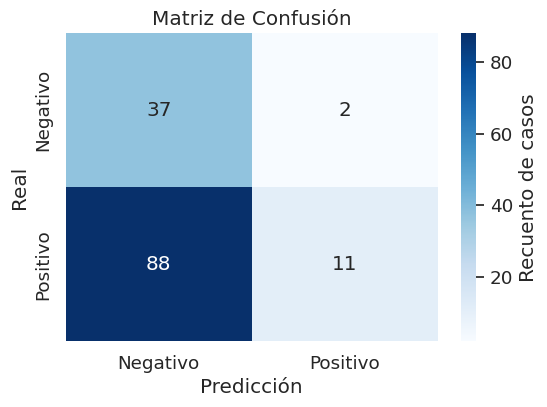

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir los recuentos de TP, TN, FP y FN
TP = TP_count
TN = TN_count
FP = FP_count
FN = FN_count

# Crear la matriz de confusión
confusion_matrix = [[TN, FP],
                    [FN, TP]]

# Definir las etiquetas para los ejes
labels = ['Negativo', 'Positivo']

# Crear la matriz de confusión con colores utilizando Seaborn
plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2)  # Ajustar el tamaño de fuente
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar_kws={'label': 'Recuento de casos'})
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.xticks([0.5, 1.5], labels)
plt.yticks([0.5, 1.5], labels)
plt.show()

In [ ]:
# Función sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Convertir las columnas a tipo numérico
df_contraste['Rentabilidad'] = pd.to_numeric(df_contraste['Rentabilidad'], errors='coerce')
df_xgb_results['Rentabilidad Real Predicha'] = pd.to_numeric(df_xgb_results['Rentabilidad Real Predicha'], errors='coerce')

predictions = df_xgb_results_binarizado['Next Day Predictions']
tickers = df_xgb_results_binarizado['Ticker']

# Crear el rango de valores para x de la sigmoide
x_values = np.linspace(-5, 5, len(df_maestro))

# Calcular los valores de la sigmoide para el rango de x
sigmoid_values = sigmoid(x_values)

# Crear el gráfico interactivo con Plotly
fig = go.Figure()

# Agregar los puntos al gráfico con la leyenda del ticker
x_values_plot = []
y_values_plot = []
text_values = []
colors = []
threshold_sum = 0  # Variable para calcular el threshold promedio
true_ups_count = 0  # Contador de True Ups

for i in range(len(tickers)):
    x_values_plot.append(i)
    y_values_plot.append(predictions_normalized.iloc[i])
    text_values.append(tickers.iloc[i])

    # Obtener los valores de rentabilidad y rentabilidad real predicha
    rentabilidad = df_contraste['Rentabilidad'].iloc[i]
    rentabilidad_real_predicha = df_xgb_results['Rentabilidad Real Predicha'].iloc[i]

    # Determinar el color del punto
    if (rentabilidad < 0 and rentabilidad_real_predicha > 0):
        colors.append('red')  # Rojo para Falsos positivos
    elif rentabilidad < 0 and rentabilidad_real_predicha < 0:
        colors.append('purple')  # Morado para ambos negativos (True Downs)
    elif rentabilidad > 0 and rentabilidad_real_predicha > 0:
        colors.append('green')  # Verde para ambos positivos (True Ups)
        threshold_sum += predictions_normalized.iloc[i]  # Sumar el valor al threshold
        true_ups_count += 1  # Incrementar el contador de True Ups
    else:
        if predictions_normalized.iloc[i] > threshold:
            colors.append('green')  # Verde si el valor es mayor que el threshold
        else:
            colors.append('blue')  # Azul para el resto de los casos

# Calcular el threshold promedio
threshold = threshold_sum / true_ups_count if true_ups_count > 0 else 0

print("El threshold óptimo basado en la distancia promedio es:", threshold)

# Agregar los puntos al gráfico
fig.add_trace(go.Scatter(
    x=x_values_plot,
    y=y_values_plot,
    mode='markers',
    marker=dict(color=colors),
    text=text_values,  # Usar el ticker como texto al pasar el cursor
    hoverinfo='text',  # Mostrar el texto al pasar el cursor
    name='Next Day Predictions'
))

# Agregar la línea de la función sigmoide al gráfico
fig.add_trace(go.Scatter(
    x=list(range(len(sigmoid_values))),
    y=sigmoid_values,
    mode='lines',
    line=dict(color='black', width=3),
    name='Sigmoide'
))

# Agregar la línea punteada para representar el threshold óptimo
threshold = max(0, min(1, threshold))  # Asegurar que el threshold esté en el rango [0, 1]
fig.add_shape(
    type="line",
    x0=0,
    y0=threshold,
    x1=len(x_values_plot),
    y1=threshold,
    line=dict(
        color="black",
        width=3,
        dash="dash",
    ),
)

# Personalizar el diseño del gráfico
fig.update_layout(
    title='Modelo BXGB',
    xaxis_title='Ticker',
    yaxis_title='Valor',
    hoverlabel=dict(bgcolor="white",
    font_size=12, font_family="Rockwell"),  # Personalizar el estilo del texto al pasar el cursor
    legend=dict(
        itemsizing='constant',
        title='Leyenda',
        font=dict(size=12),
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1
    )
)

# Añadir leyenda manualmente
fig.add_trace(go.Scatter(
    x=[None],
    y=[None],
    mode='markers',
    marker=dict(size=10, color='red'),
    legendgroup='group1',
    showlegend=True,
    name='False Positives'
))

fig.add_trace(go.Scatter(
    x=[None],
    y=[None],
    mode='markers',
    marker=dict(size=10, color='purple'),
    legendgroup='group2',
    showlegend=True,
    name='True Downs'
))

fig.add_trace(go.Scatter(
    x=[None],
    y=[None],
    mode='markers',
    marker=dict(size=10, color='green'),
    legendgroup='group3',
    showlegend=True,
    name='True Ups'
))

fig.add_trace(go.Scatter(
    x=[None],
    y=[None],
    mode='markers',
    marker=dict(size=10, color='blue'),
    legendgroup='group4',
    showlegend=True,
    name='False Negatives'
))

fig.show()

El threshold óptimo basado en la distancia promedio es: 0.3891215581891381


In [ ]:
# Inicializar contadores para cada color
red_count = 0
purple_count = 0
green_count = 0
blue_count = 0

# Sumar los colores
for color in colors:
    if color == 'red':
        red_count += 1
    elif color == 'purple':
        purple_count += 1
    elif color == 'green':
        green_count += 1
    elif color == 'blue':
        blue_count += 1

# Mostrar los totales de cada color
print("Total de Falsos Positivos (red):", red_count)
print("Total de Verdaderos Downs (purple):", purple_count)
print("Total de Verdaderos Ups (green):", green_count)
print("Total de Falsos Negativos (blue):", blue_count)


Total de Falsos Positivos (red): 2
Total de Verdaderos Downs (purple): 37
Total de Verdaderos Ups (green): 47
Total de Falsos Negativos (blue): 52


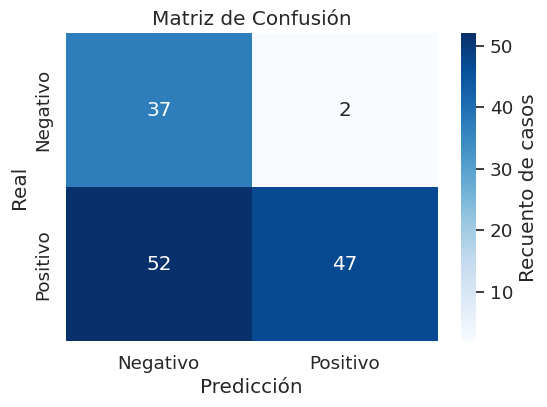

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir los recuentos de TP, TN, FP y FN
TP = green_count
TN = purple_count
FP = red_count
FN = blue_count

# Crear la matriz de confusión
confusion_matrix = [[TN, FP],
                    [FN, TP]]

# Definir las etiquetas para los ejes
labels = ['Negativo', 'Positivo']

# Crear la matriz de confusión con colores utilizando Seaborn
plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2)  # Ajustar el tamaño de fuente
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar_kws={'label': 'Recuento de casos'})
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.xticks([0.5, 1.5], labels)
plt.yticks([0.5, 1.5], labels)
plt.show()
